# Compare classification models trained jointly with BetaVAE

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [2]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [3]:
df1 = load_experiment_sessions('MoNA', 'betavae_clf_nextron', [
    'experiment01_pfi.csv', 'experiment02_pfi.csv', 'experiment03_pfi.csv', 'experiment04_pfi.csv'])

df2 = load_experiment_sessions('HMDB', 'betavae_clf_nextron', [
    'experiment01_pfi.csv', 'experiment02_pfi.csv'])

df = pd.concat([df1, df2], ignore_index=True)
df.insert(1, 'target_column', '')
df.insert(2, 'target_column_id', '')
df.insert(df.columns.get_loc('param_clf_n_classes'), 'param_n_classes', '')
df['target_column'] = df['clf_target_column']
df['target_column_id'] = df['clf_target_column_id']
df['param_n_classes'] = df['param_clf_n_classes']

df = df.drop(['clf_target_column', 'clf_target_column_id', 'param_clf_n_classes'], axis=1)
# df.to_csv(utils.get_project_path() / '.model' / 'clf_latent.csv')
df

,name,target_column,target_column_id,dataset,full_model_name,layer_config,clf_layer_config,input_columns,clf_input_columns,class_subset,...,m_test_accuracy_score,m_test_balanced_accuracy_score,m_test_recall_score_macro,m_test_precision_score_macro,m_test_f1_score_macro,m_test_avg_cos_sim,m_test_avg_eu_dist,m_test_avg_per_chag,m_test_avg_per_diff,feature_importance
0,betavae_clf,ionization_mode,ionization_mode_id,MoNA,betavae_clf_100-800-200-3-200-800-100_01 (13-0...,"[[100, 800, 200, 3], [3, 200, 800, 100]]","[724, 482]",['spectrum'],"['spectrum', 'collision_energy', 'total_exact_...",[],...,0.973675,0.973698,0.973698,0.973853,0.973424,0.902587,0.423512,120068.195312,1.412463,"{'precursor_type_id': -0.0029894021195765565, ..."
1,betavae_clf,ionization_mode,ionization_mode_id,MoNA,betavae_clf_100-800-200-3-200-800-100_01 (13-0...,"[[100, 800, 200, 3], [3, 200, 800, 100]]","[724, 482]",['spectrum'],"['spectrum', 'collision_energy', 'total_exact_...",[],...,0.991084,0.990989,0.990989,0.991194,0.991017,0.902587,0.423512,120068.195312,1.412463,"{'precursor_mz': -0.0006398720255948898, 'prec..."
2,betavae_clf,ionization_mode,ionization_mode_id,MoNA,betavae_clf_100-800-200-3-200-800-100_01 (13-0...,"[[100, 800, 200, 3], [3, 200, 800, 100]]","[724, 482]",['spectrum'],"['spectrum', 'collision_energy', 'total_exact_...",[],...,0.962806,0.962607,0.962607,0.963066,0.962555,0.902587,0.423512,120068.195312,1.412463,"{'precursor_type_id': -0.0010797840431917673, ..."
3,betavae_clf,ionization_mode,ionization_mode_id,MoNA,betavae_clf_100-800-200-3-200-800-100_01 (13-0...,"[[100, 800, 200, 3], [3, 200, 800, 100]]","[724, 482]",['spectrum'],"['spectrum', 'collision_energy', 'total_exact_...",[],...,0.979195,0.979030,0.979030,0.979760,0.979036,0.902587,0.423512,120068.195312,1.412463,"{'total_exact_mass': 0.0, 'kingdom_id': 0.0, '..."
4,betavae_clf,ionization_mode,ionization_mode_id,MoNA,betavae_clf_100-800-200-3-200-800-100_01 (13-0...,"[[100, 800, 200, 3], [3, 200, 800, 100]]","[724, 482]",['spectrum'],"['spectrum', 'collision_energy', 'total_exact_...",[],...,0.982507,0.982508,0.982508,0.982618,0.982367,0.902587,0.423512,120068.195312,1.412463,"{'spectrum': -0.00010997800439915828, 'collisi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,betavae_clf,class,class_id,HMDB,betavae_clf_100-800-200-20-200-800-100_02 (15-...,"[[100, 800, 200, 20], [20, 200, 800, 100]]","[47, 31]",['spectrum'],"['spectrum', 'collision_energy', 'ionization_m...","[198, 96, 32, 173, 61, 238, 94, 70, 106, 131, ...",...,0.400000,0.153846,0.153846,0.166667,0.160000,0.826429,0.537422,92575.671875,0.770893,"{'collision_energy': 0.0, 'kingdom_id': 0.0, '..."
257,betavae_clf,class,class_id,HMDB,betavae_clf_100-800-200-20-200-800-100_02 (15-...,"[[100, 800, 200, 20], [20, 200, 800, 100]]","[47, 31]",['spectrum'],"['spectrum', 'collision_energy', 'ionization_m...","[198, 96, 32, 173, 61, 238, 94, 70, 106, 131, ...",...,0.433333,0.200000,0.200000,0.200000,0.200000,0.826429,0.537422,92575.671875,0.770893,"{'spectrum': -0.08333333333333337, 'superclass..."
258,betavae_clf,class,class_id,HMDB,betavae_clf_100-800-200-20-200-800-100_02 (15-...,"[[100, 800, 200, 20], [20, 200, 800, 100]]","[47, 31]",['spectrum'],"['spectrum', 'collision_energy', 'ionization_m...","[198, 96, 32, 173, 61, 238, 94, 70, 106, 131, ...",...,0.733333,0.500000,0.500000,0.500000,0.500000,0.826429,0.537422,92575.671875,0.770893,"{'collision_energy': 0.0, 'ionization_mode_id'..."
259,betavae_clf,class,class_id,HMDB,betavae_clf_100-800-200-20-200-800-100_02 (15-...,"[[100, 800, 200, 20], [20, 200, 800, 100]]","[47, 31]",['spectrum'],"['spectrum', 'collision_energy', 'ionization_m...","[198, 96, 32, 173, 61, 238, 94, 70, 106, 131, ...",...,0.300000,0.222222,0.222222,0.400000,0.240000,0.826429,0.537422,92575.671875,0.770893,"{'collision_energy': -0.016666666666666663, 'k..."


In [4]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

### [VAE] Scores vs. architecture

In [5]:
vae_scores = ['m_train_cos_sim', 'm_train_eu_dist', 'm_train_per_chag', 'm_train_per_diff']
vae_avg_scores = ['m_train_avg_cos_sim', 'm_train_avg_eu_dist', 'm_train_avg_per_chag', 'm_train_avg_per_diff']

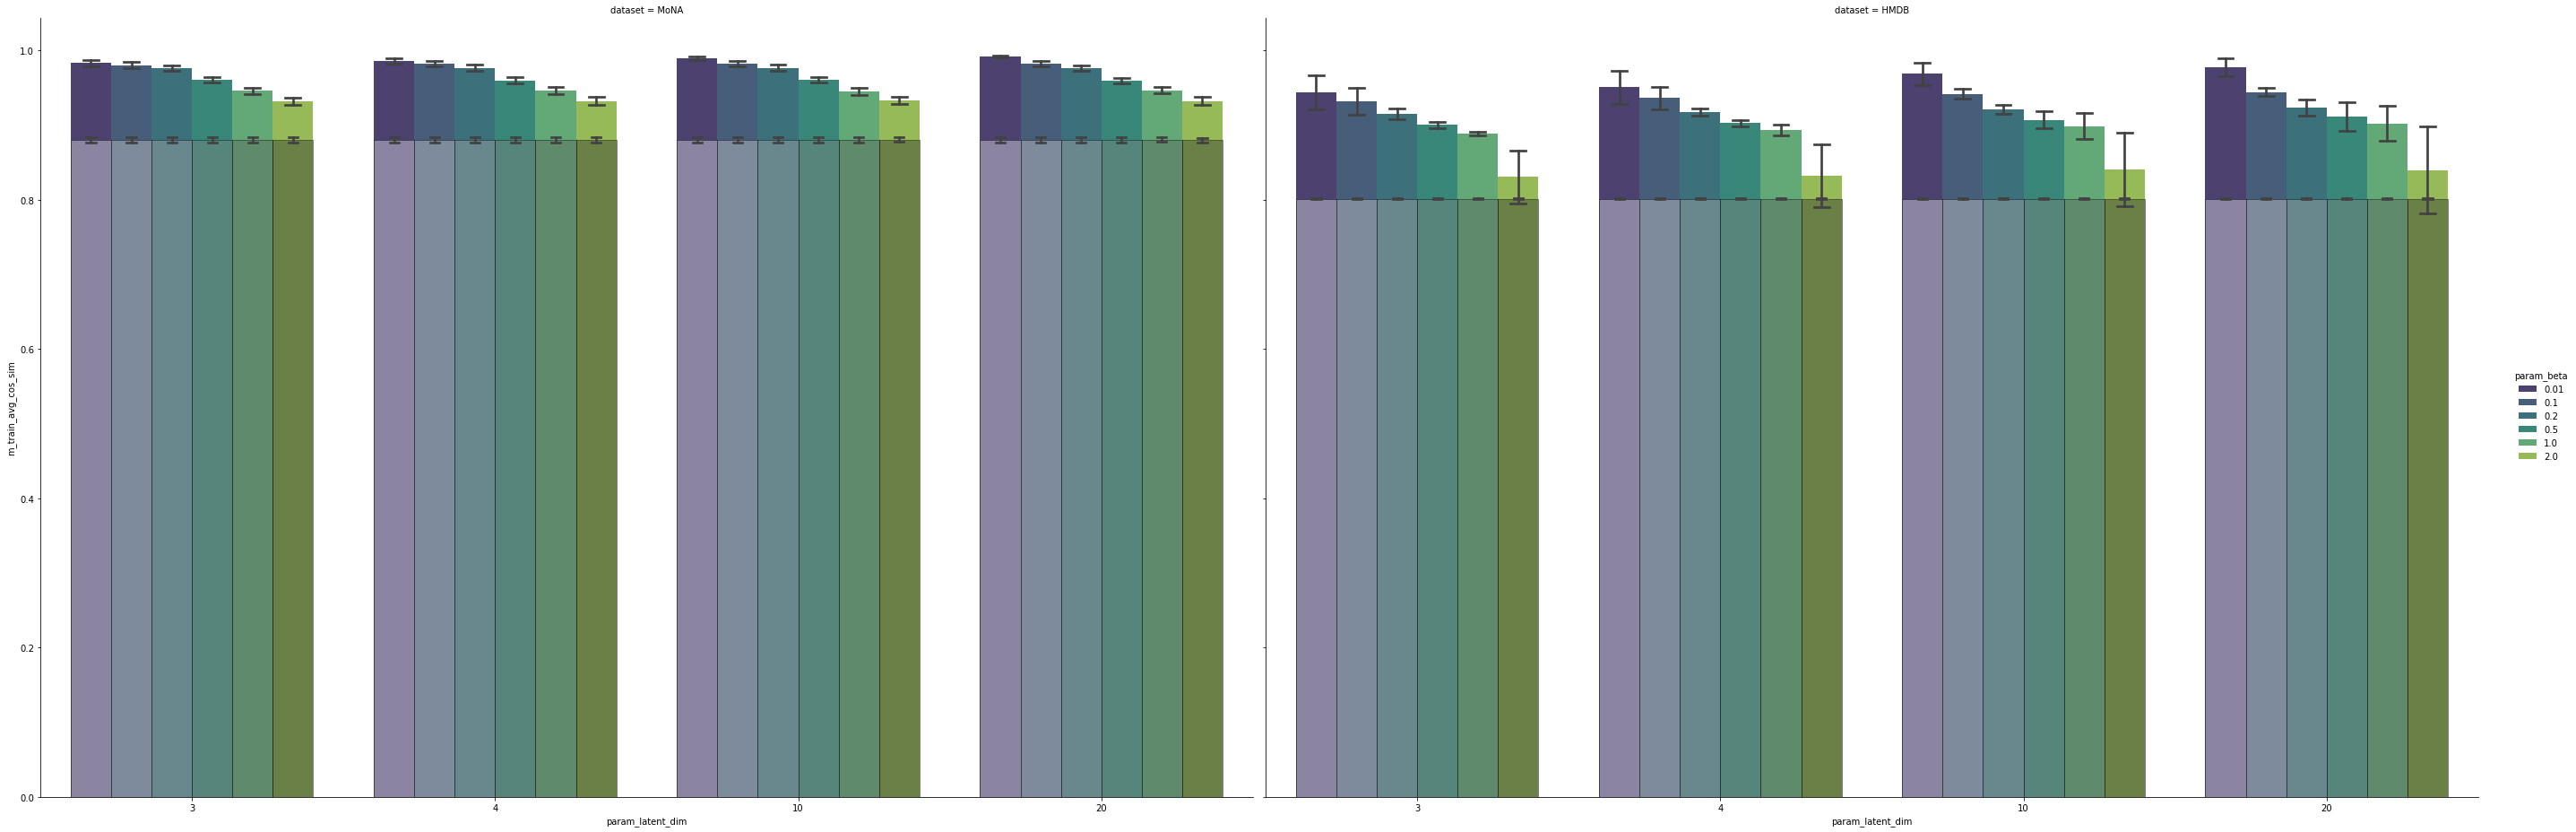

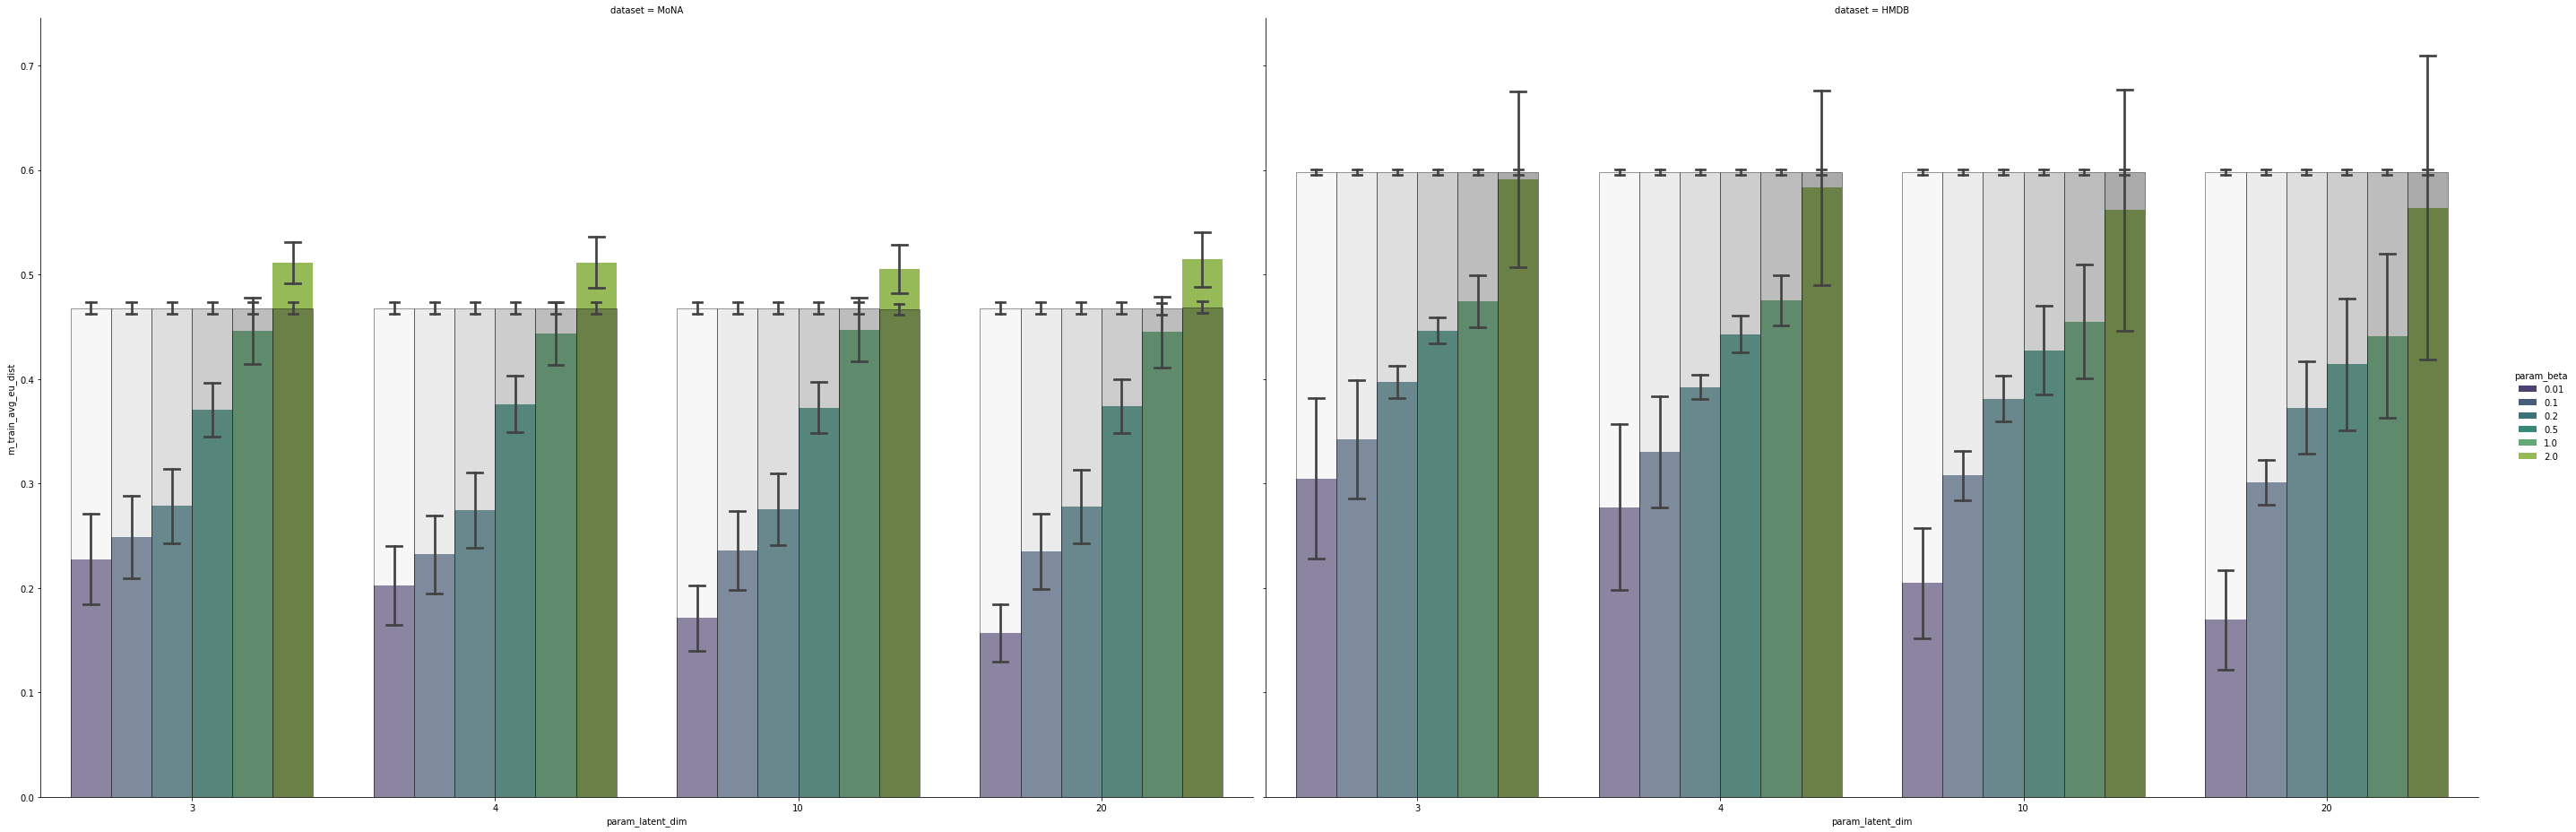

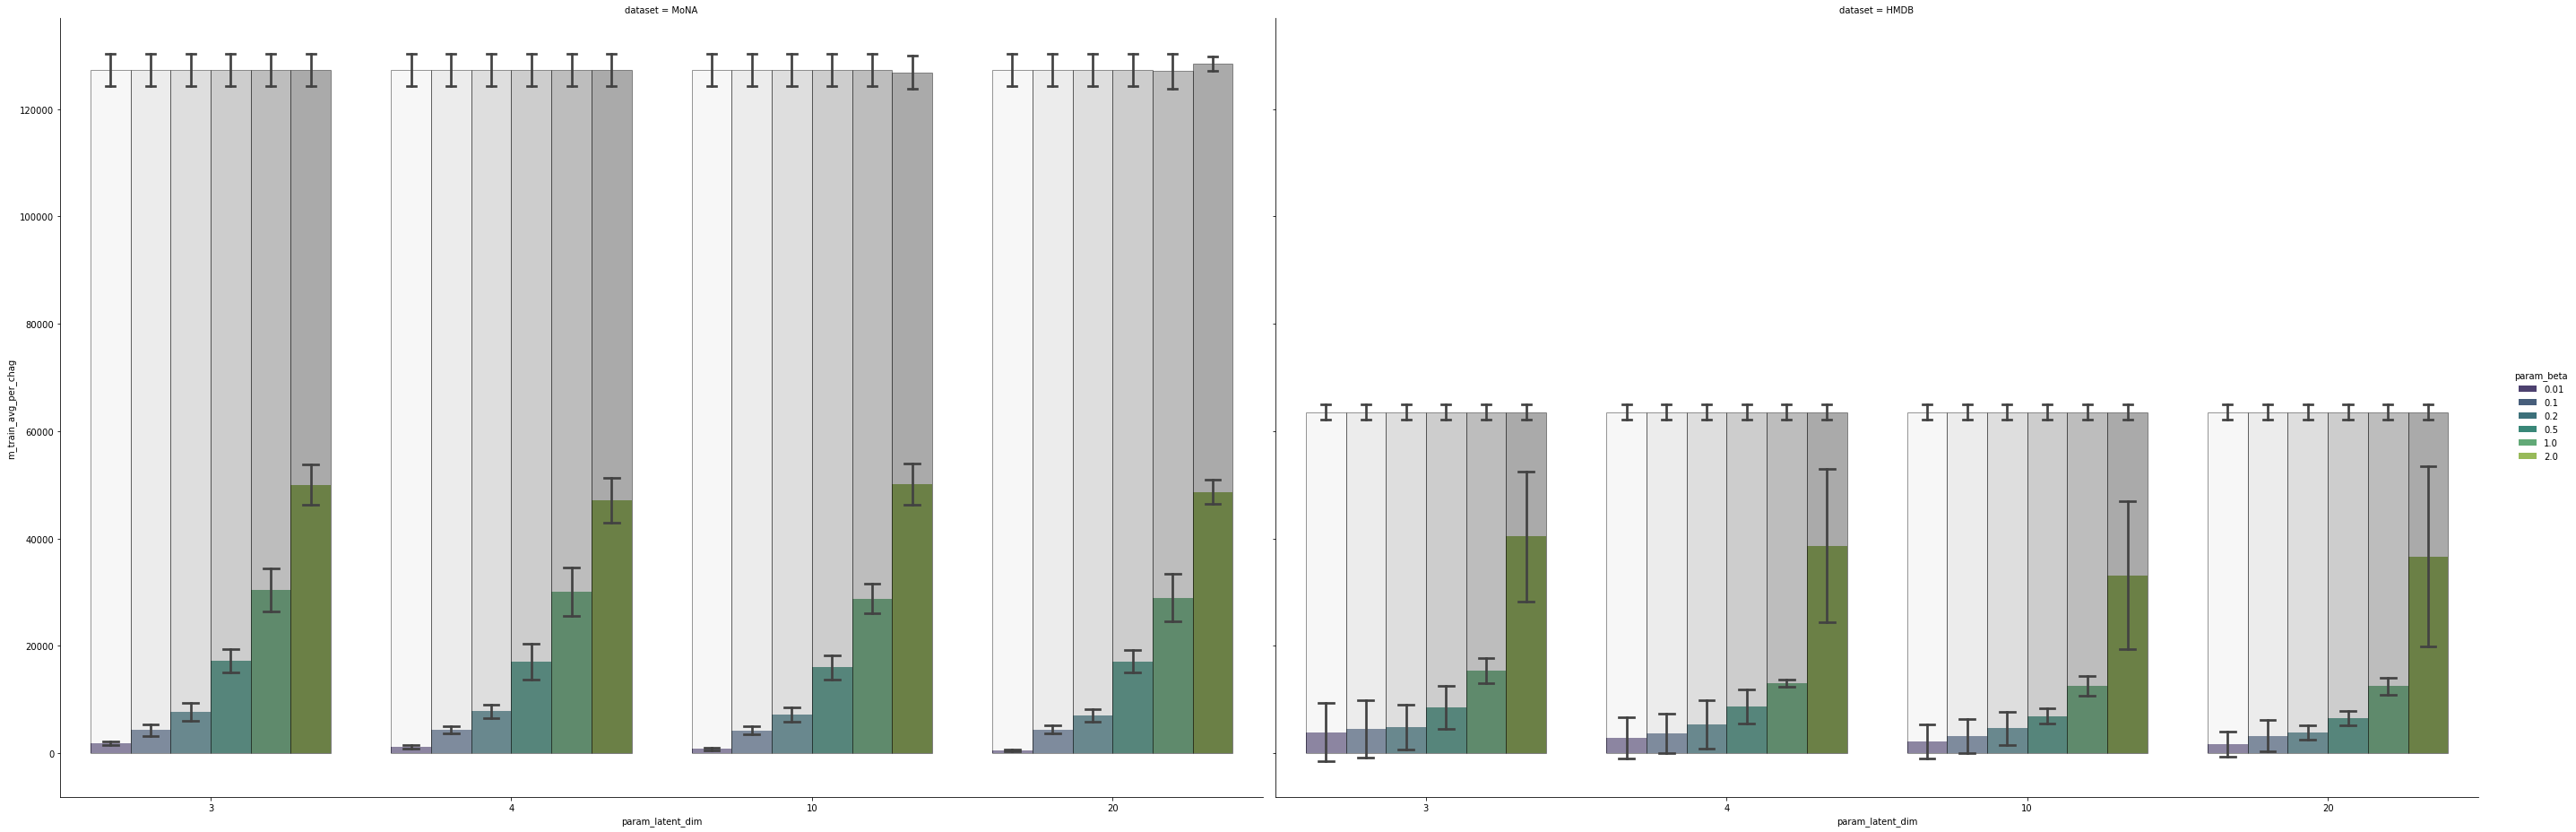

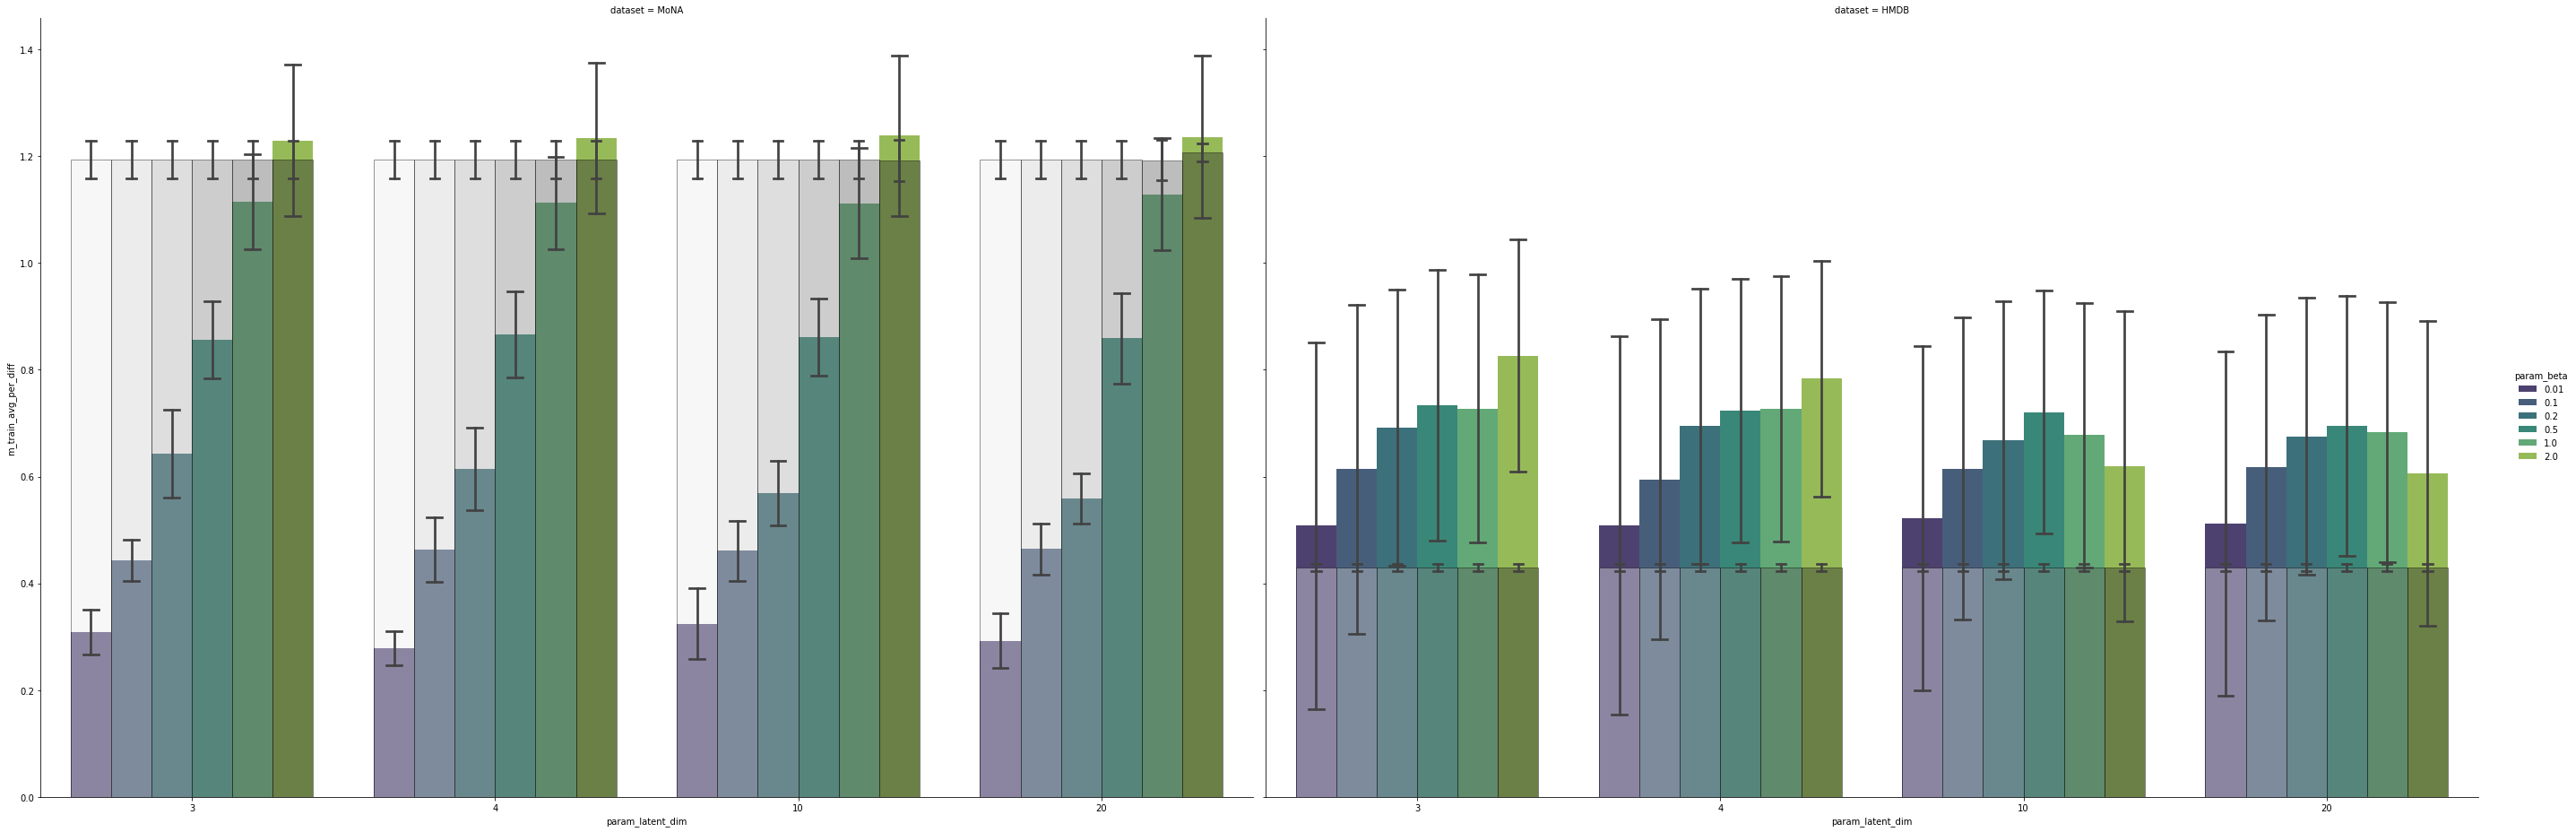

In [6]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    ax = sns.catplot(data=df, x='param_latent_dim', y=column, col='dataset',
        kind="bar", hue='param_beta', ci="sd", capsize=.05, height=13, aspect=1.5, palette='viridis', saturation=0.6)
    ax.map(sns.barplot, 'param_latent_dim', avg_column, data=df, hue='param_beta', order=df['param_latent_dim'].unique().tolist(),
        ci="sd", capsize=.03, alpha=0.4, linewidth=1., palette='Greys', edgecolor="black")

### [VAE] Scores vs. Latent dim

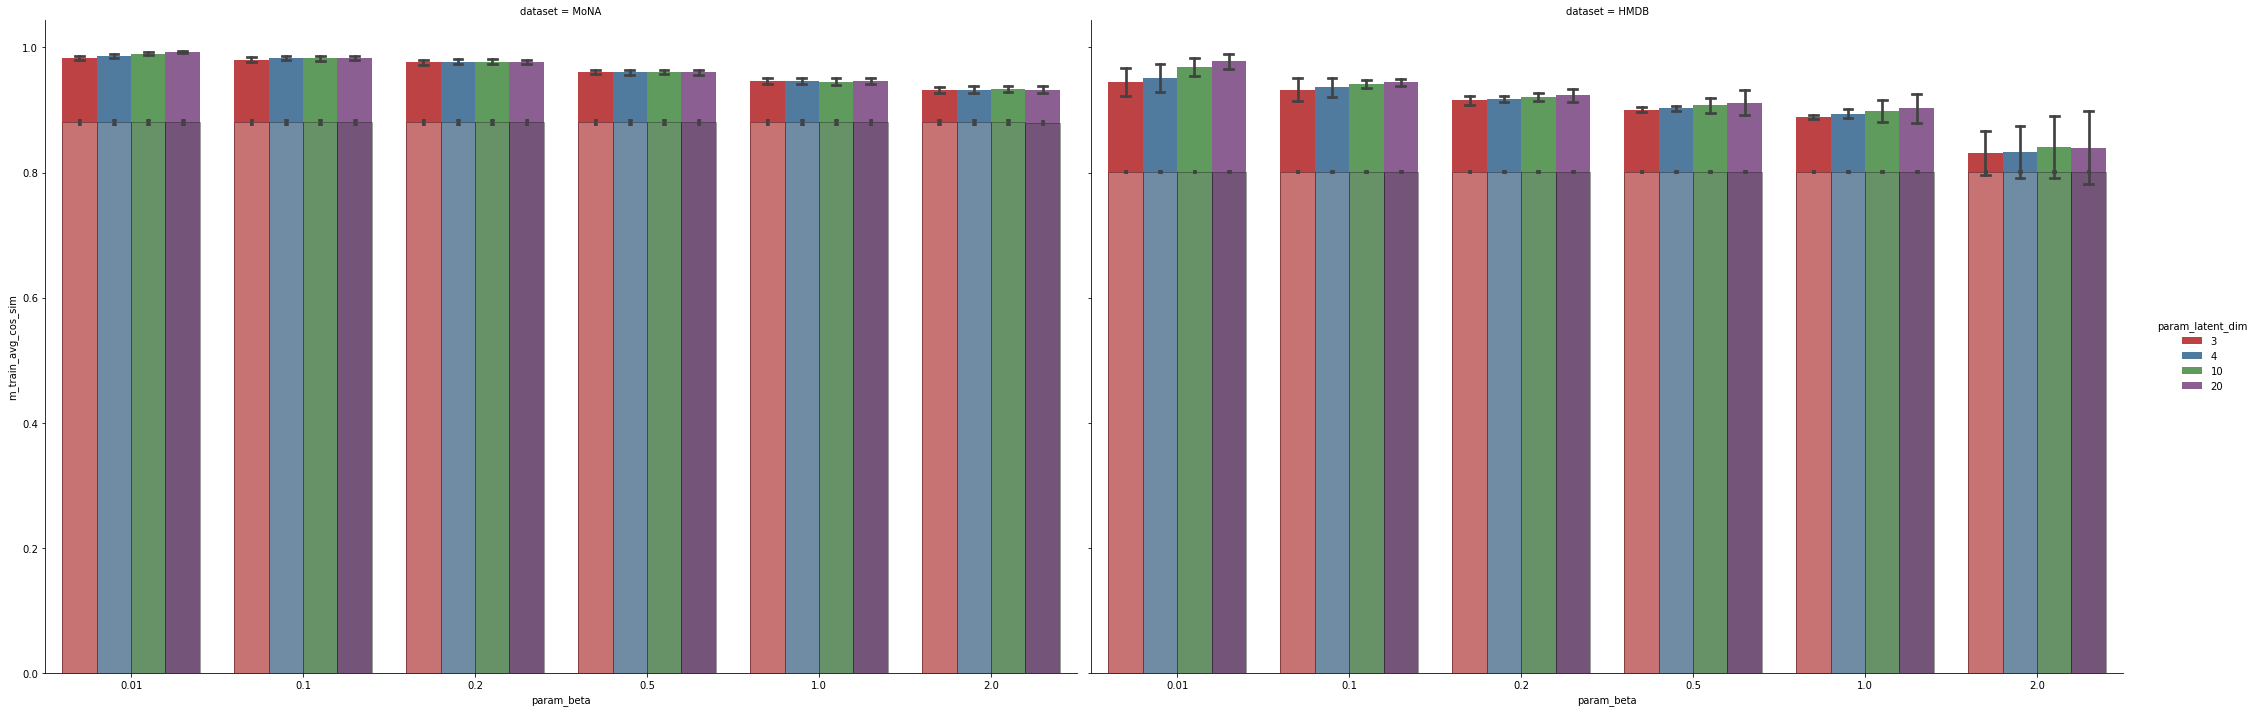

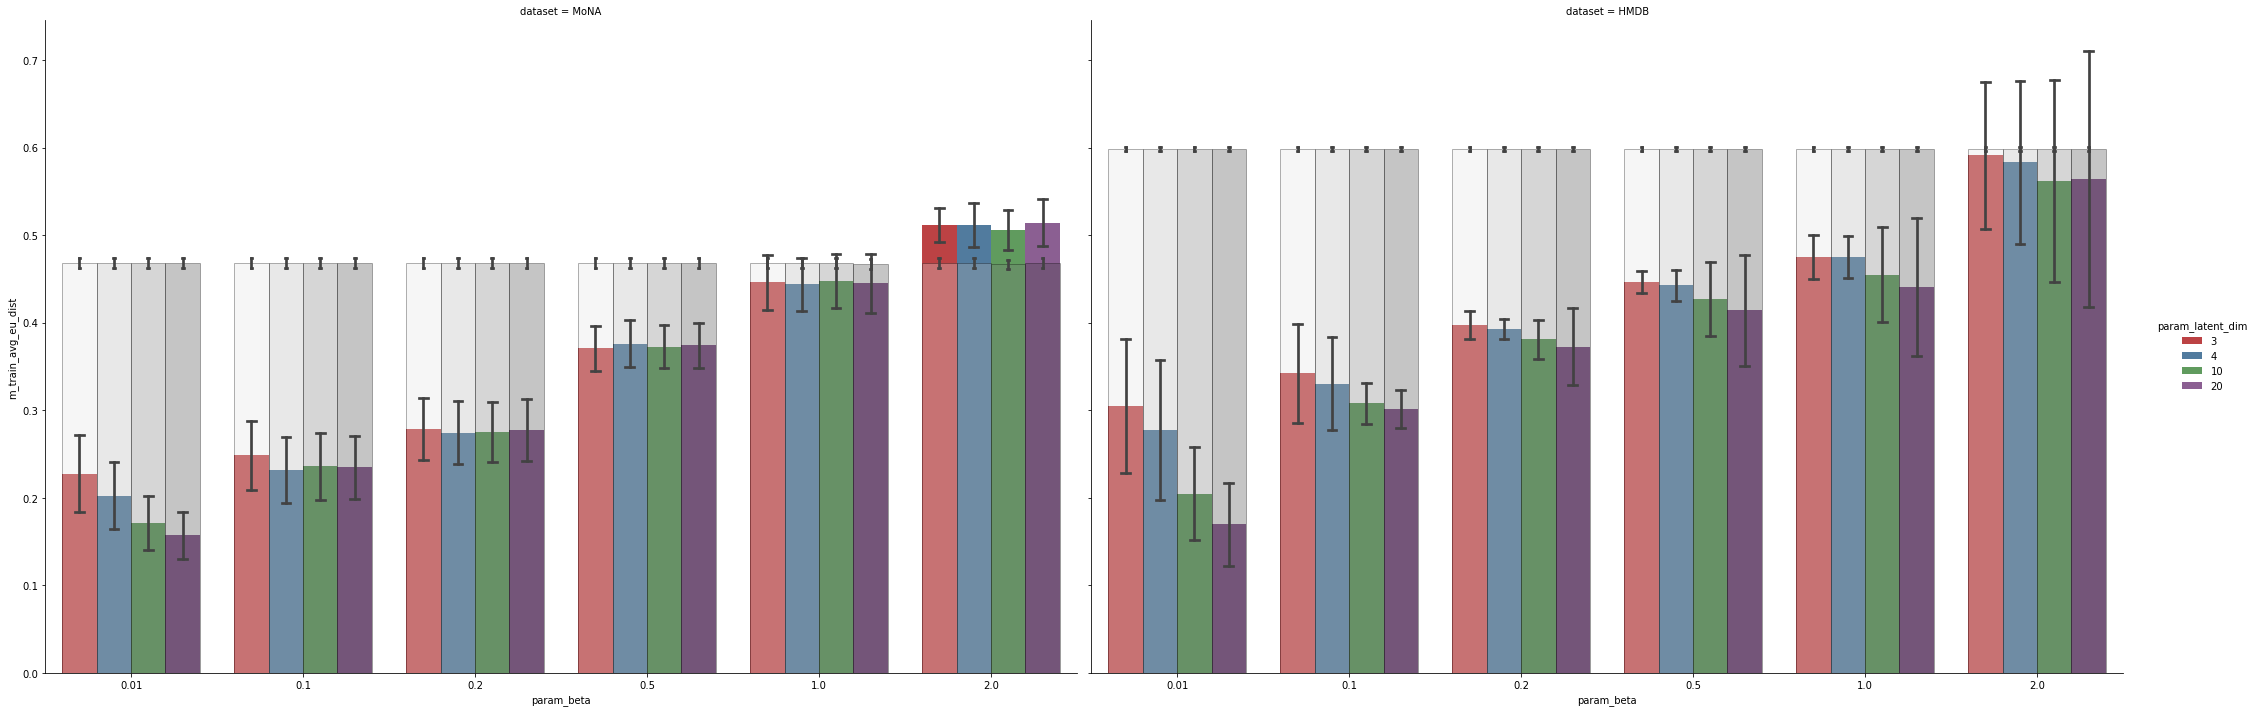

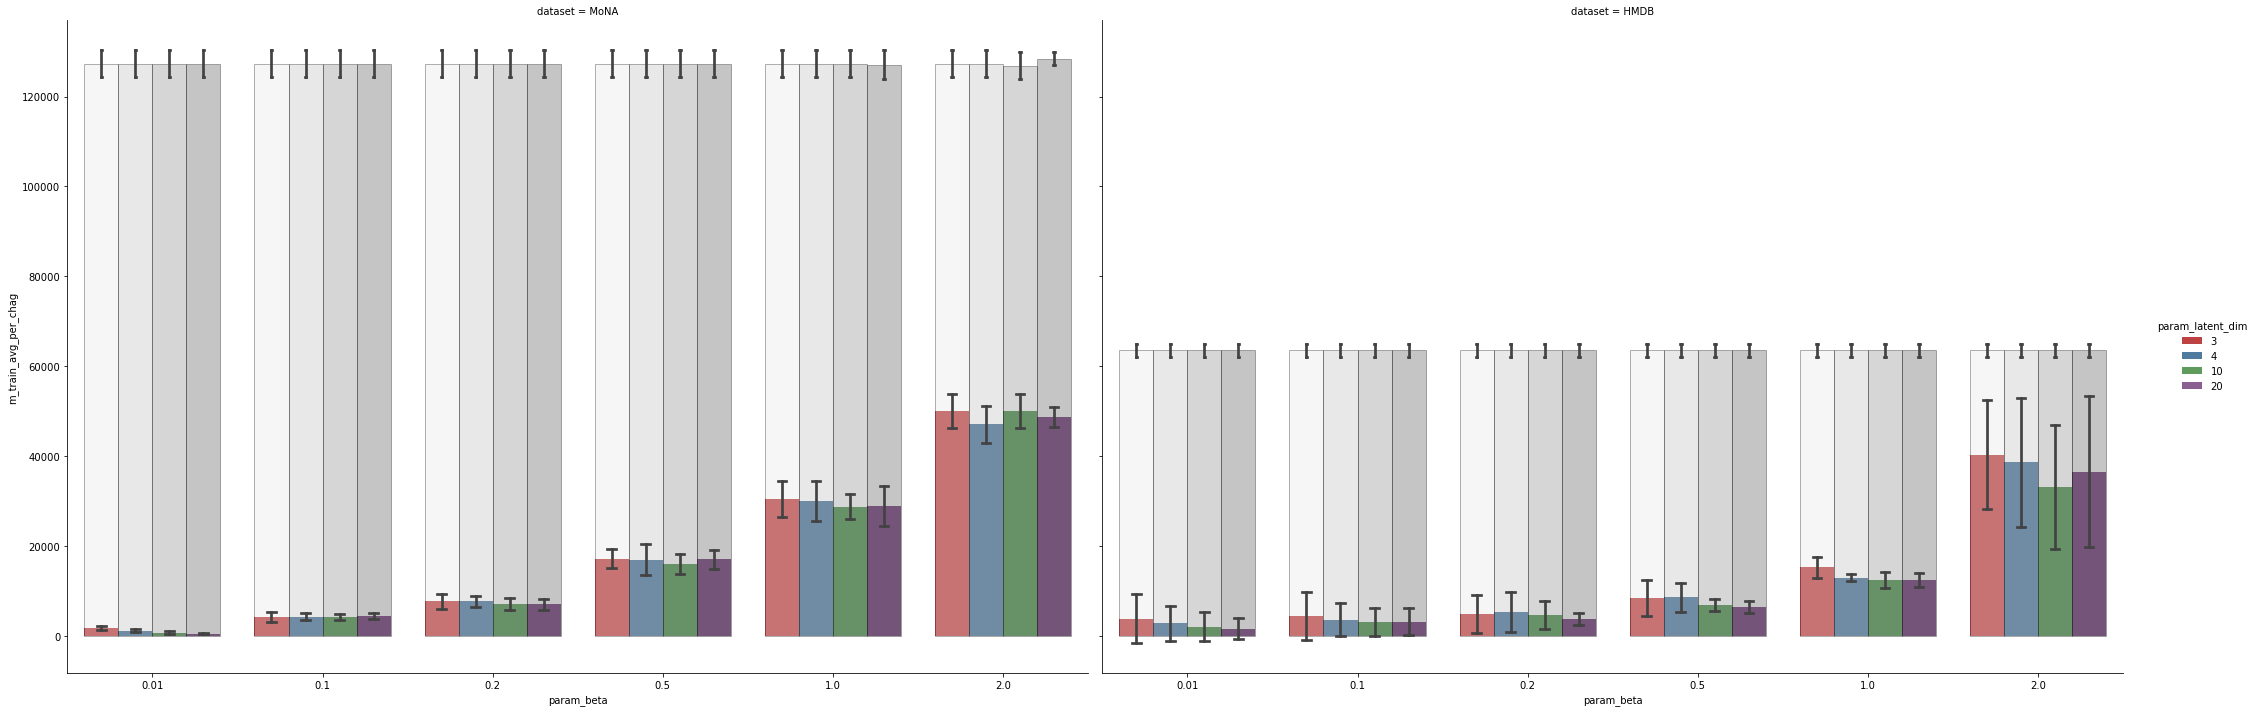

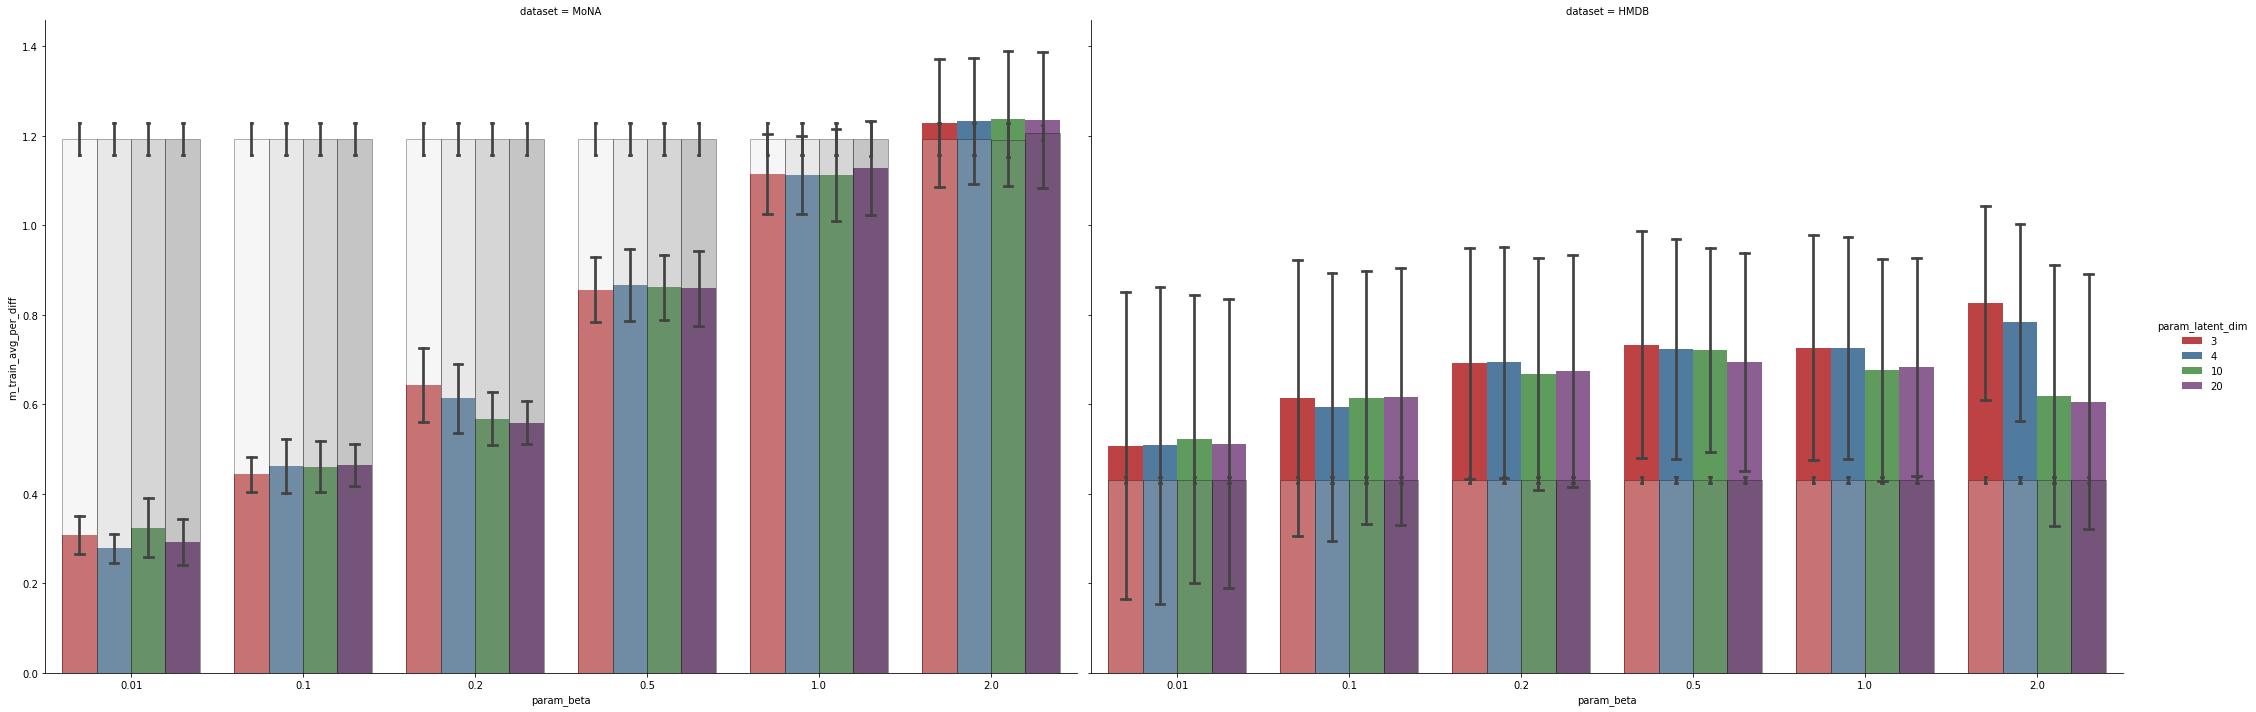

In [7]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    ax = sns.catplot(data=df, x="param_beta", y=column, col='dataset',
        hue='param_latent_dim', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='Set1', saturation=0.6)
    ax.map(sns.barplot, 'param_beta', avg_column, data=df, hue='param_latent_dim', order=df['param_beta'].unique().tolist(),
        ci="sd", capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")

### [VAE] Scores vs. number of peaks

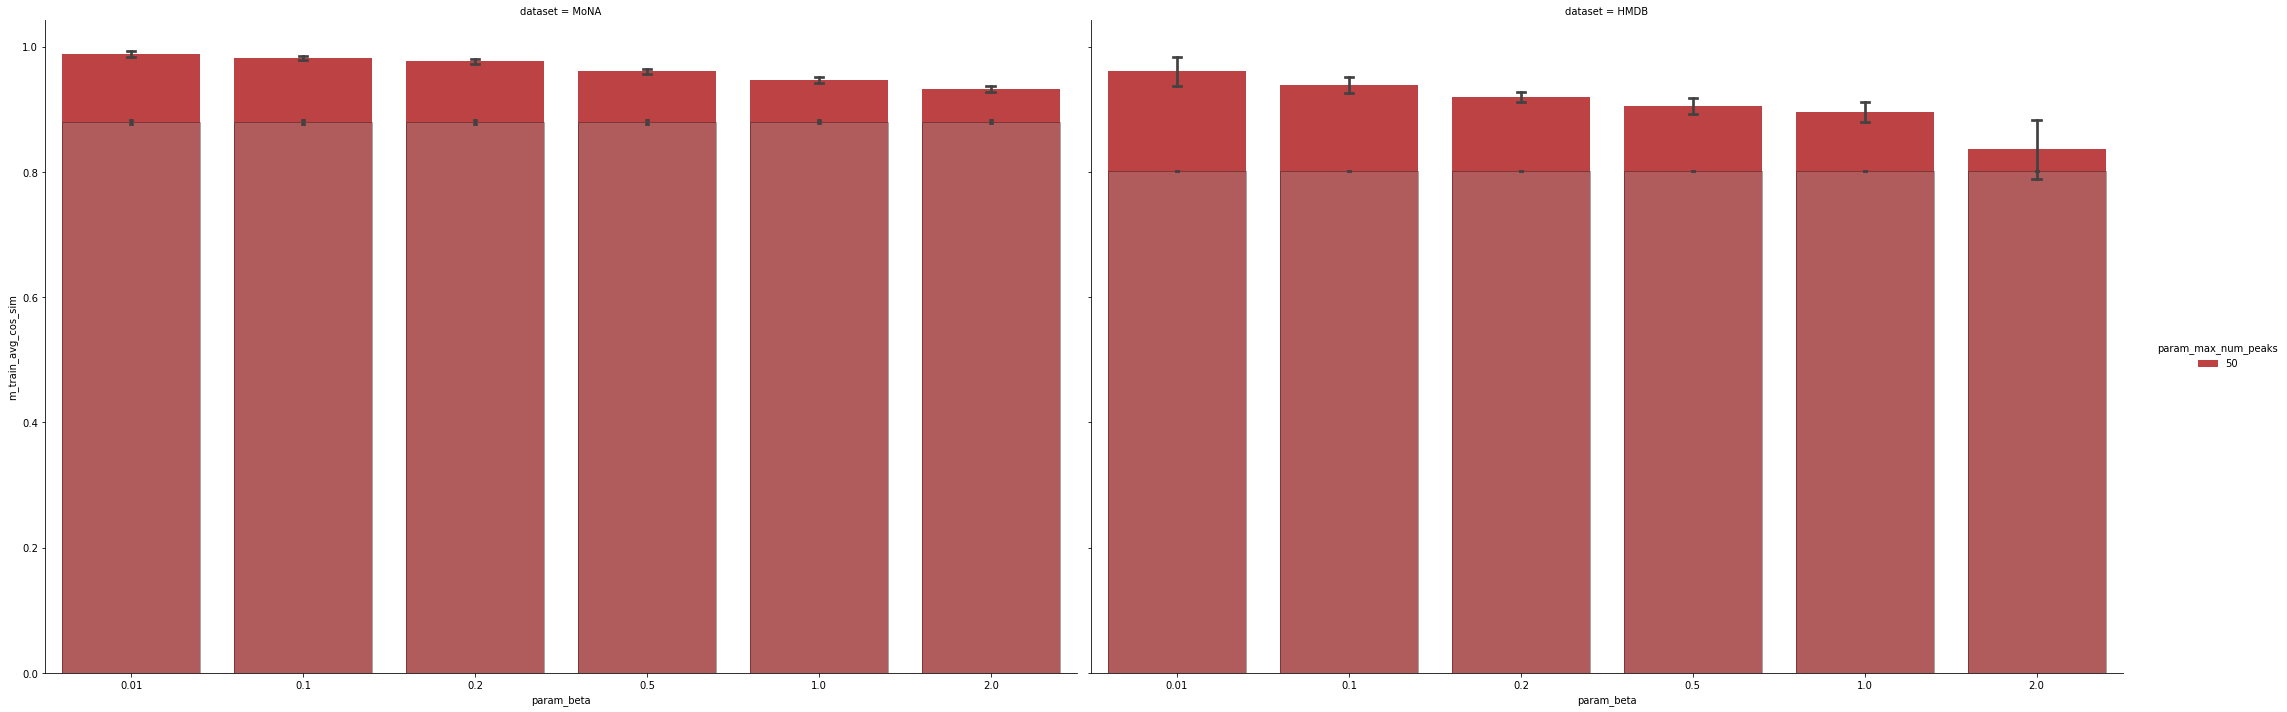

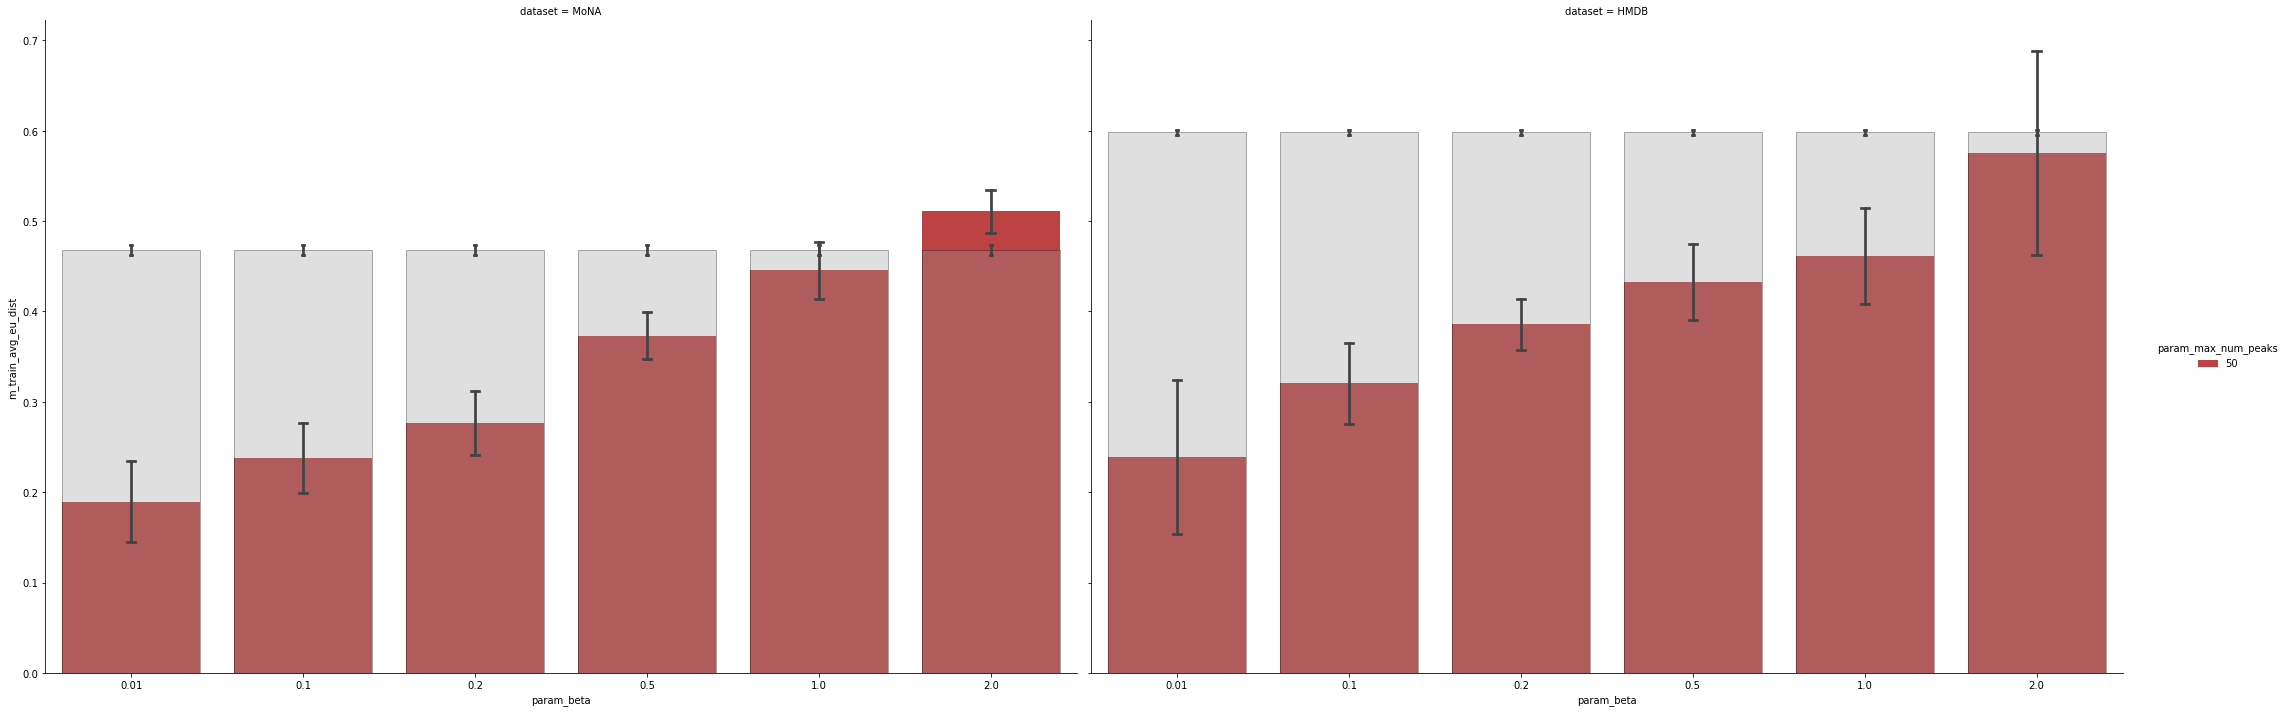

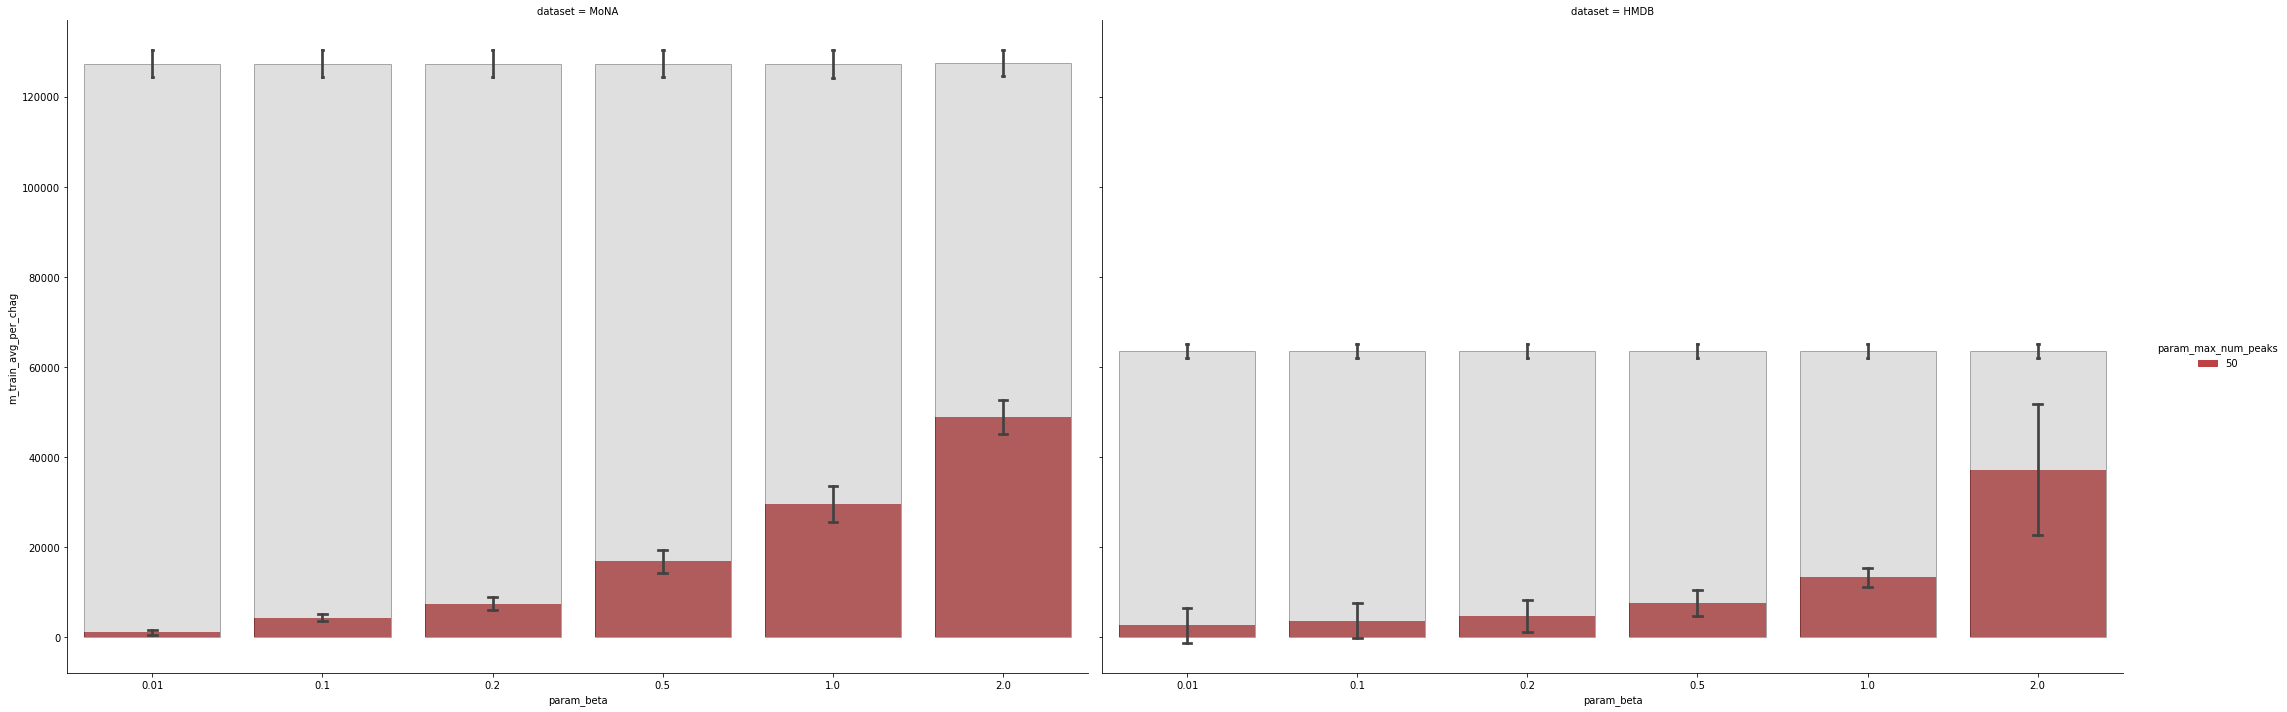

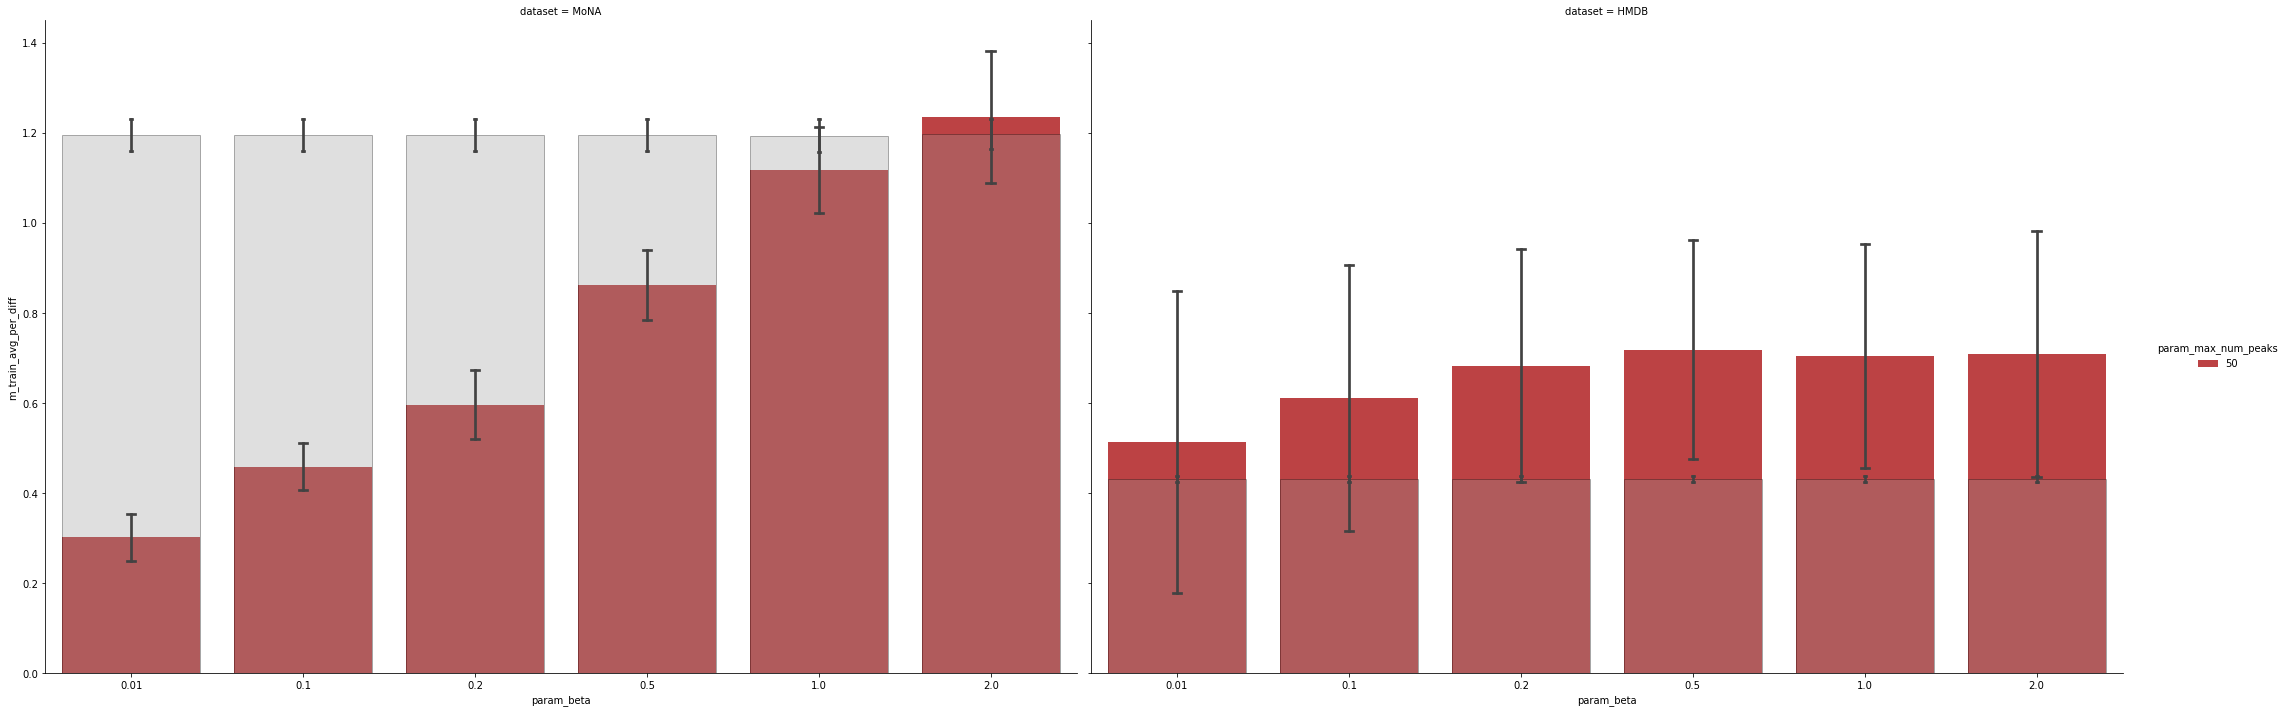

In [8]:
for column, avg_column in zip(vae_scores, vae_avg_scores):
    ax = sns.catplot(data=df, x="param_beta", y=column, col='dataset',
        hue='param_max_num_peaks', kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5, palette='Set1', saturation=0.6)
    ax.map(sns.barplot, 'param_beta', avg_column, data=df, hue='param_max_num_peaks', order=df['param_beta'].unique().tolist(),
        ci="sd", capsize=.01, alpha=0.3, linewidth=1., palette='Greys', edgecolor="black")

### [CLF] Scores vs VAE latent space

In [9]:
clf_scores = ['m_train_accuracy_score', 'm_train_balanced_accuracy_score', 'm_train_recall_score_macro', 'm_train_precision_score_macro', 'm_train_f1_score_macro']

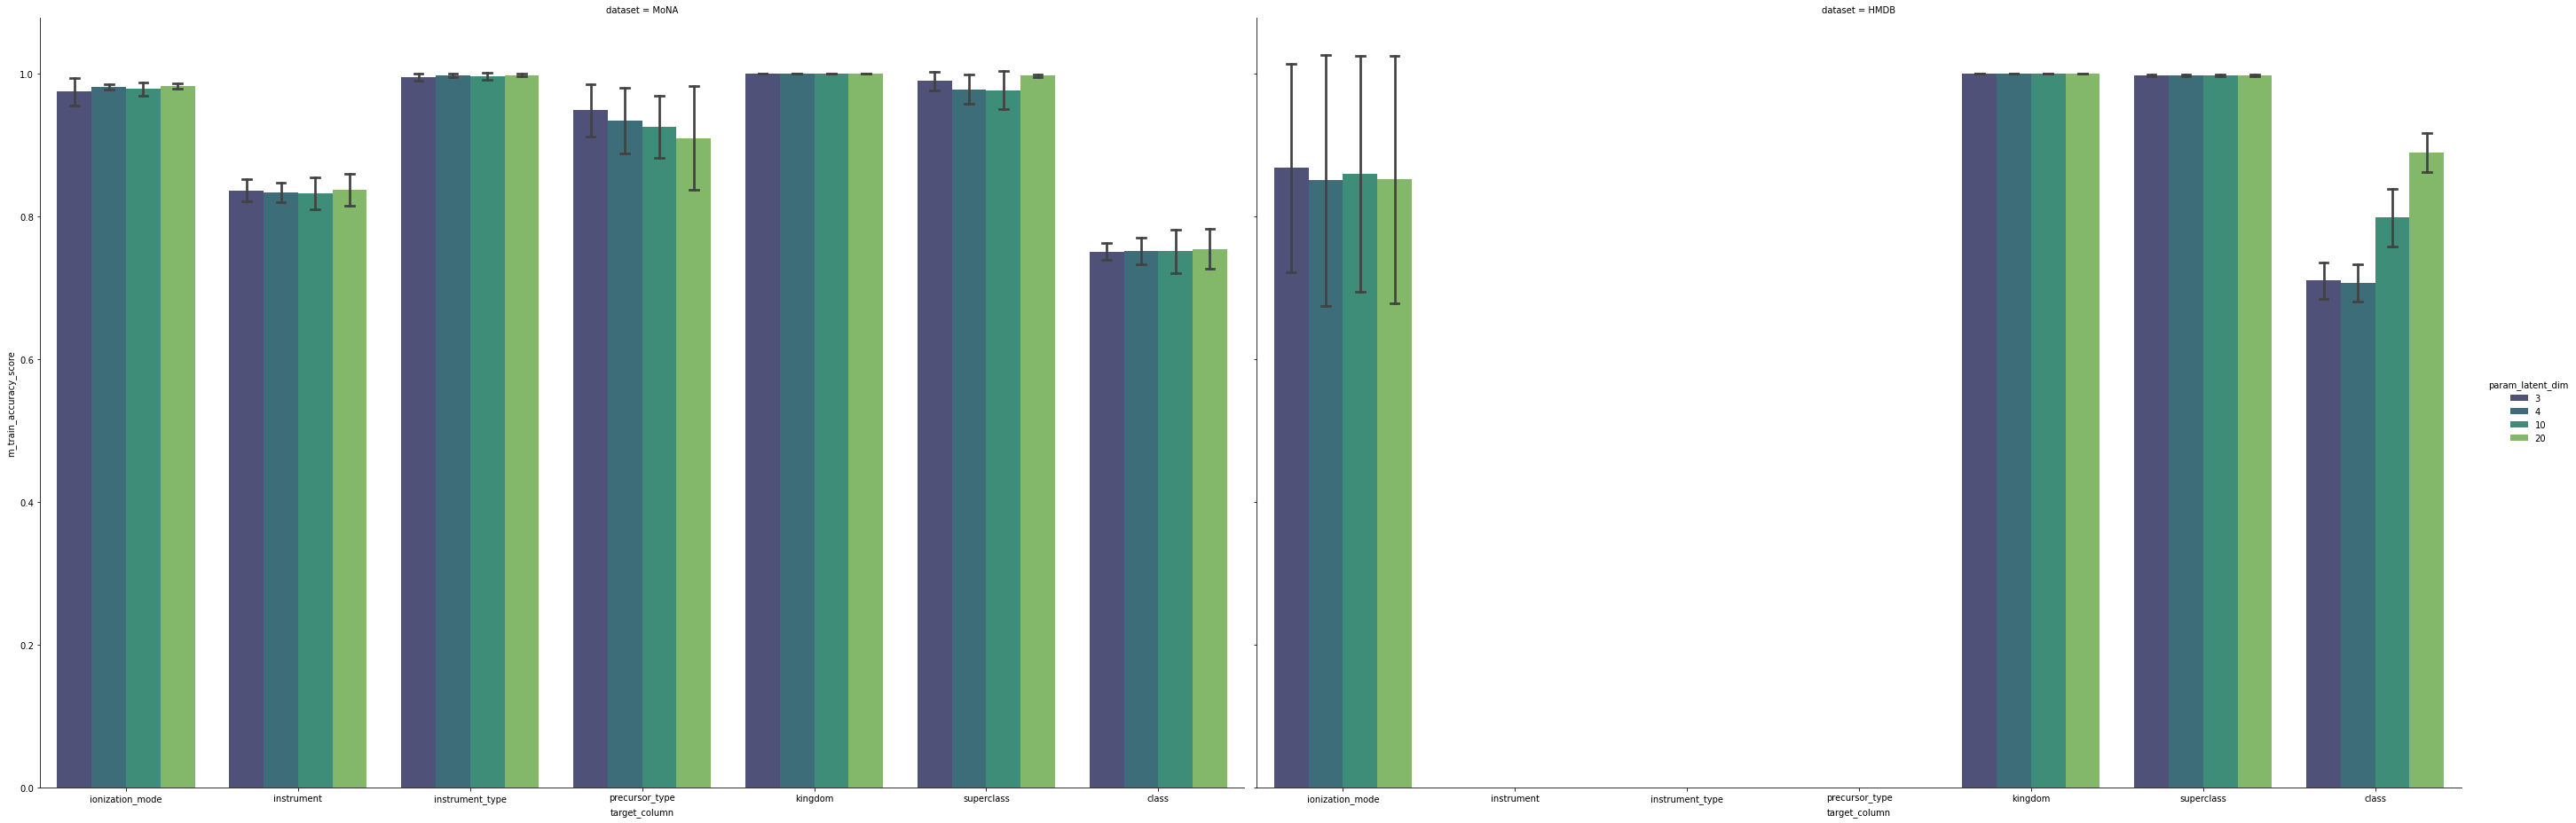

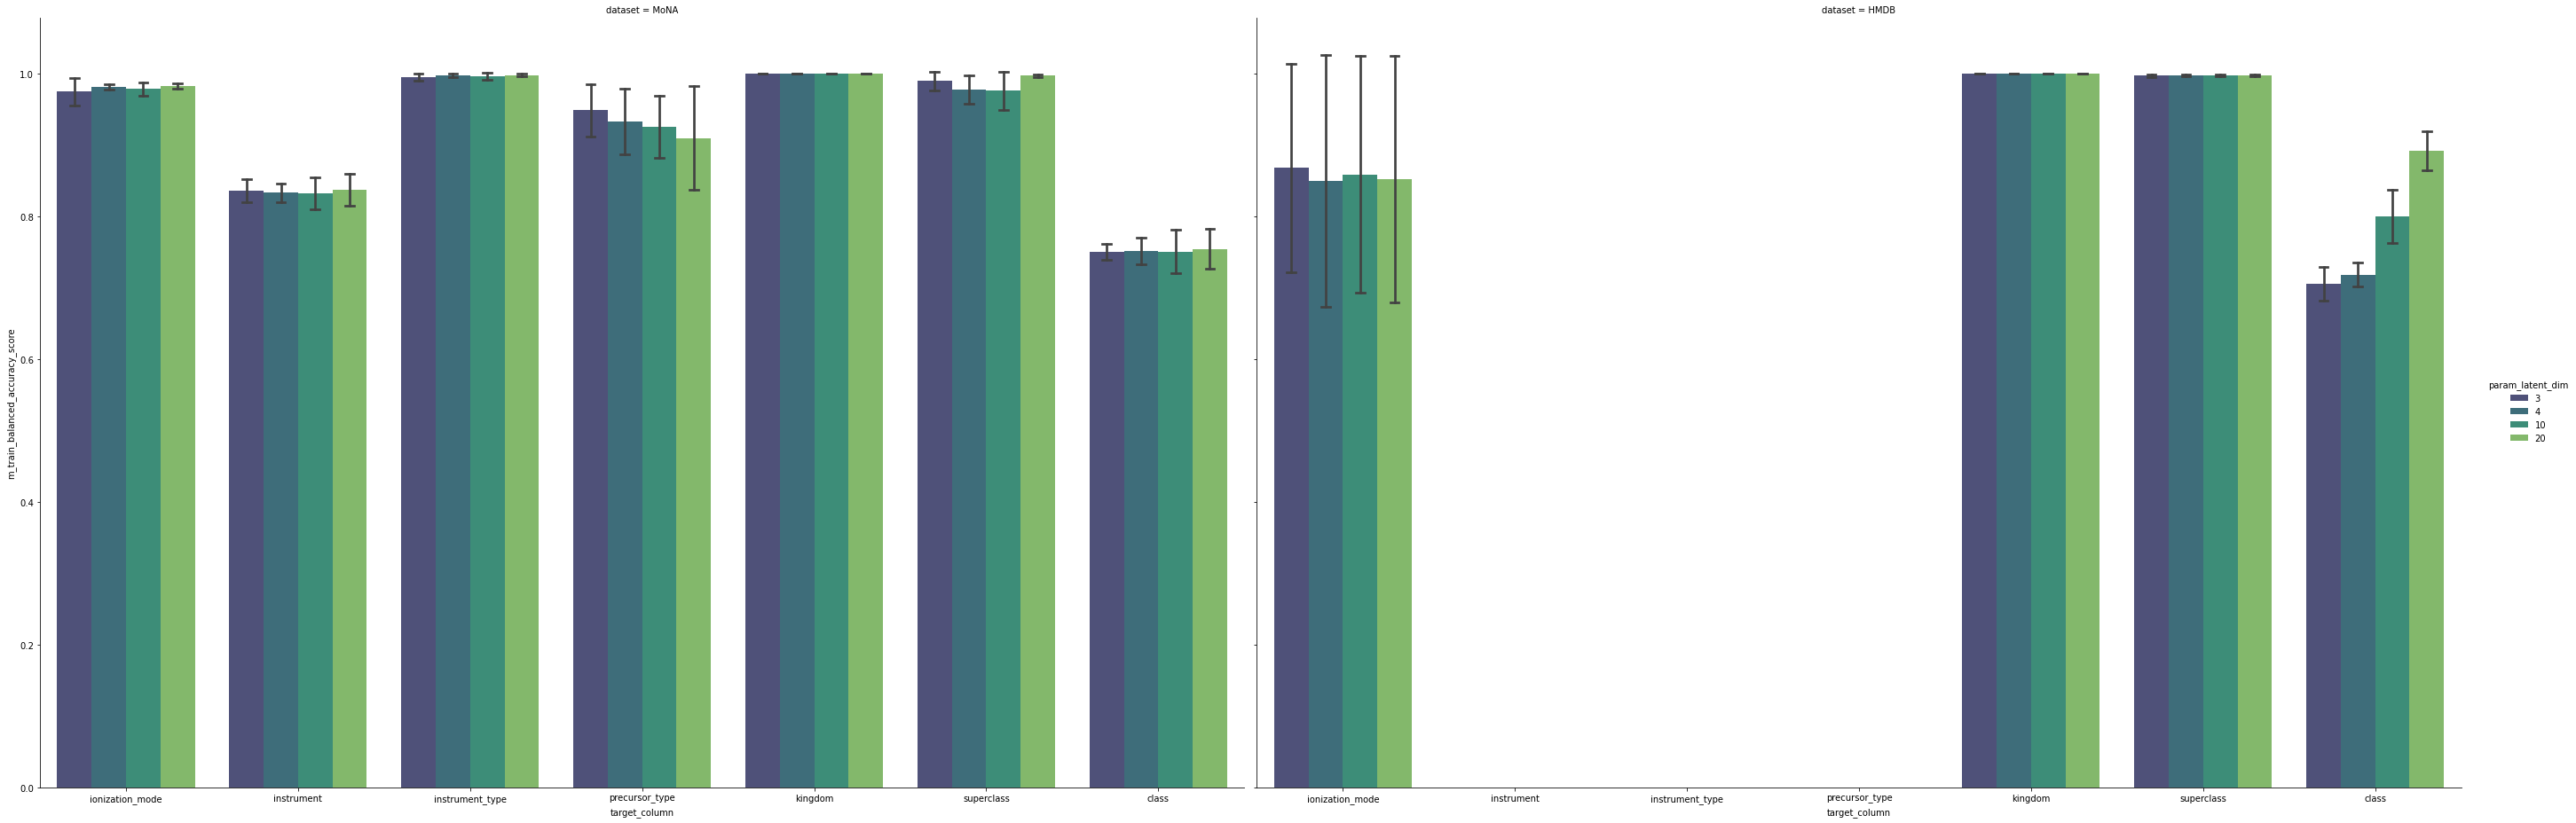

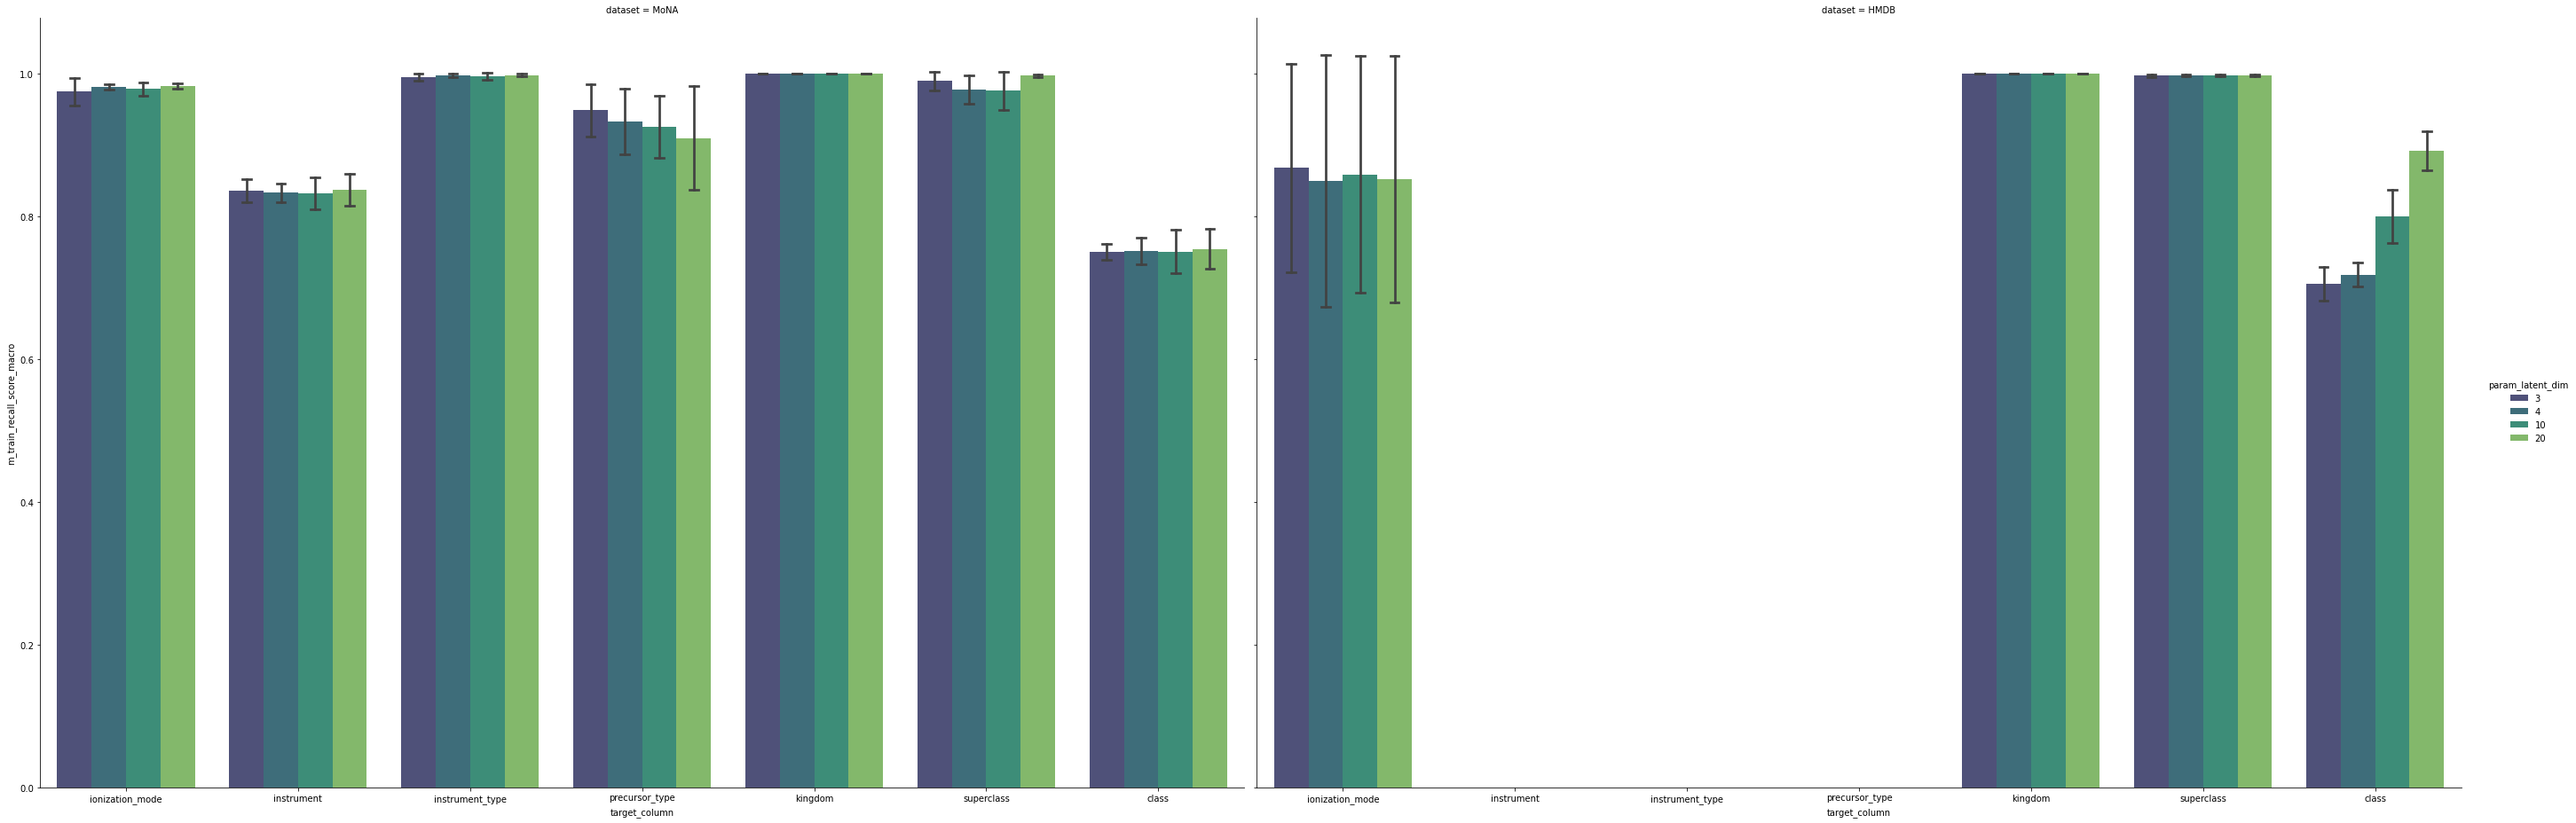

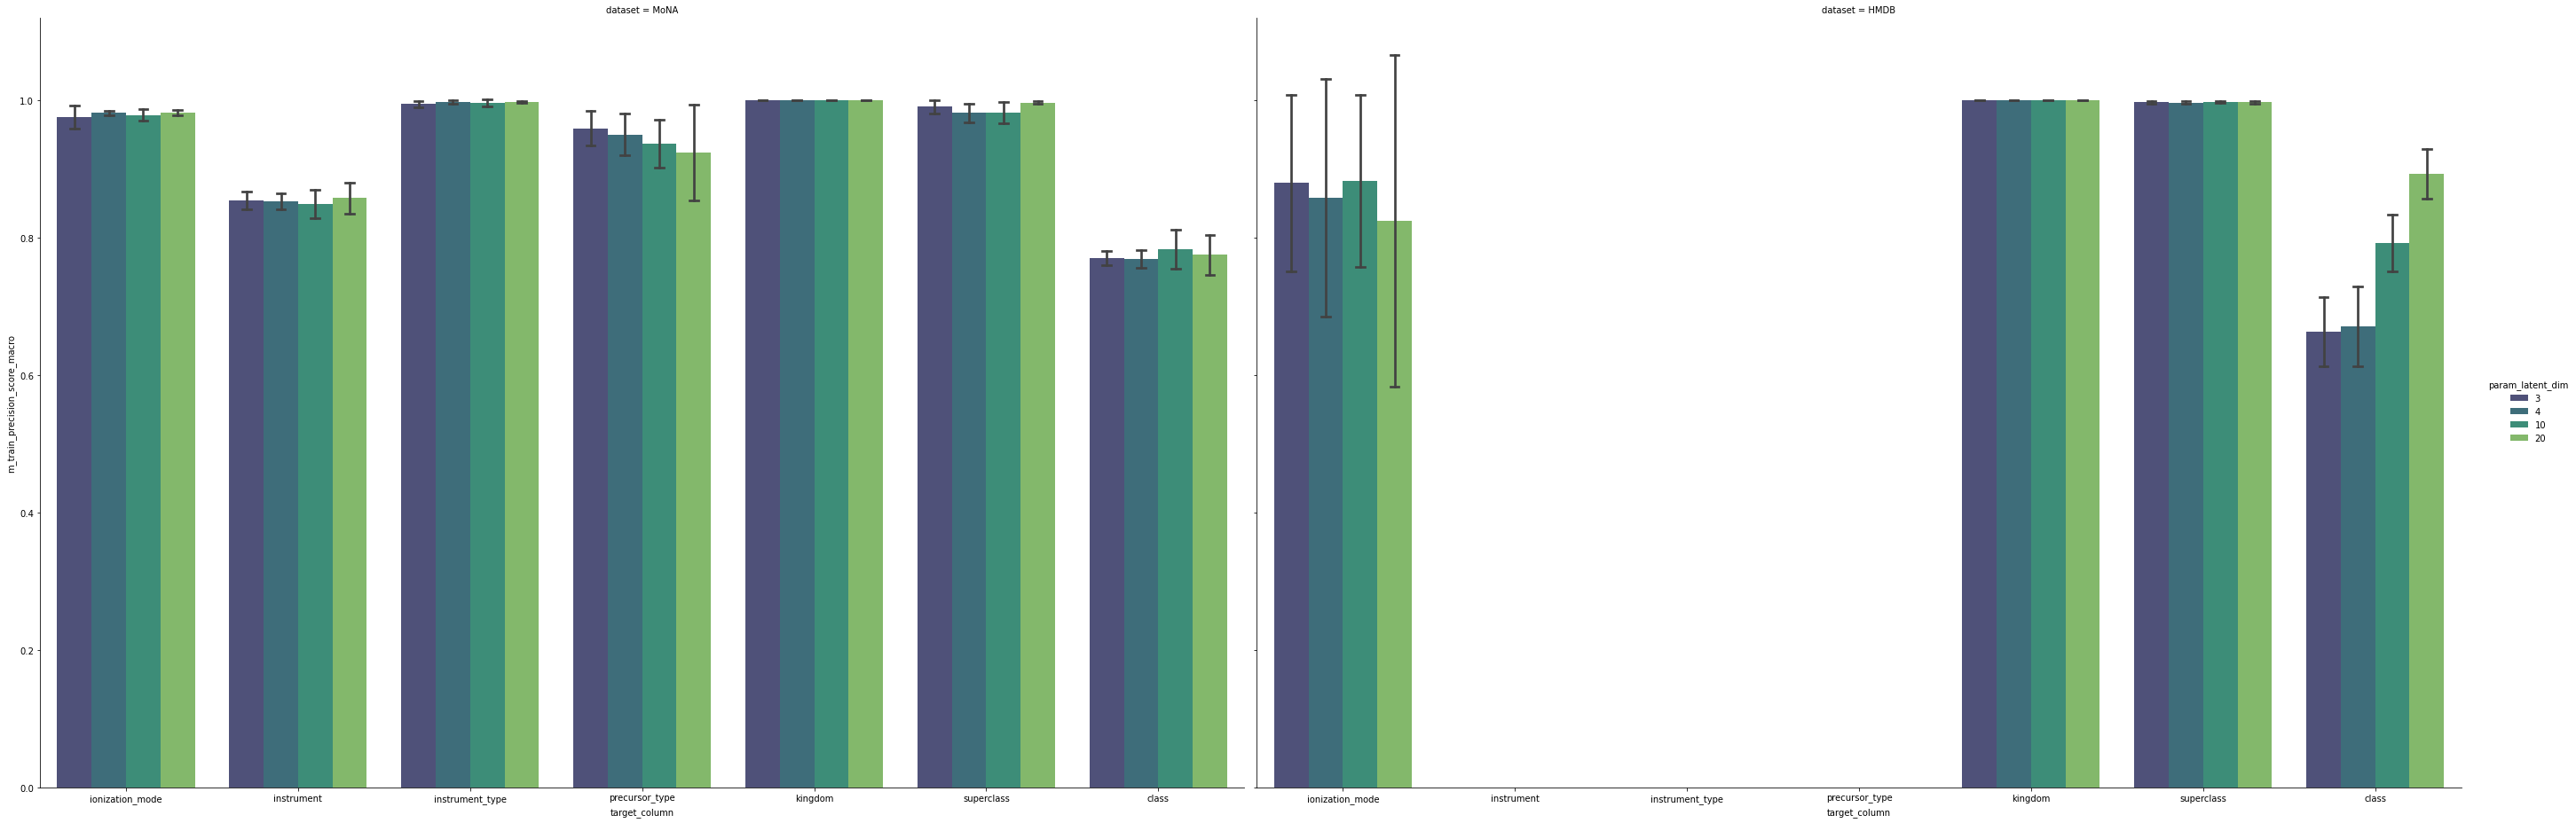

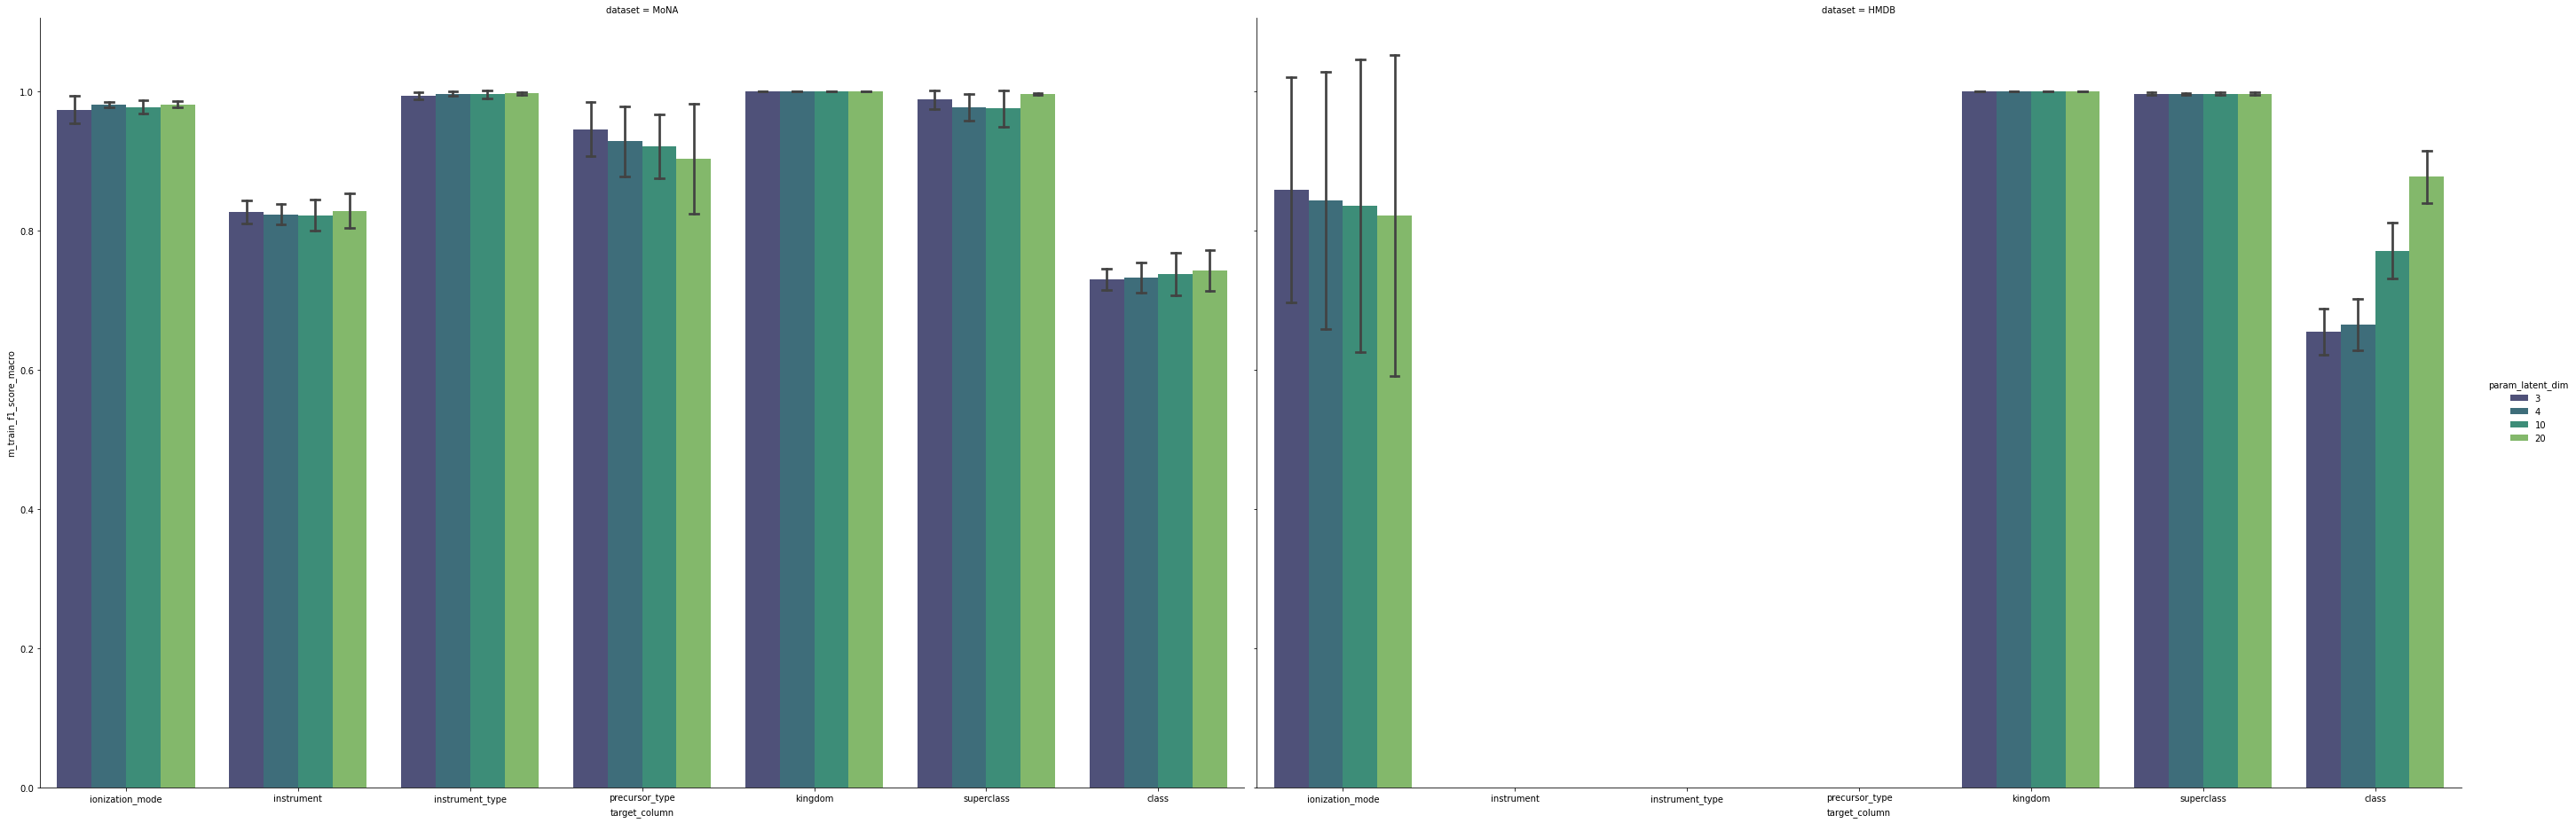

In [10]:
for column in clf_scores:
    ax = sns.catplot(data=df, x='target_column', y=column, col='dataset',
        kind="bar", hue='param_latent_dim', ci="sd", capsize=.05, height=13, aspect=1.5, palette='viridis', saturation=0.6)

### [CLF] Scores vs beta

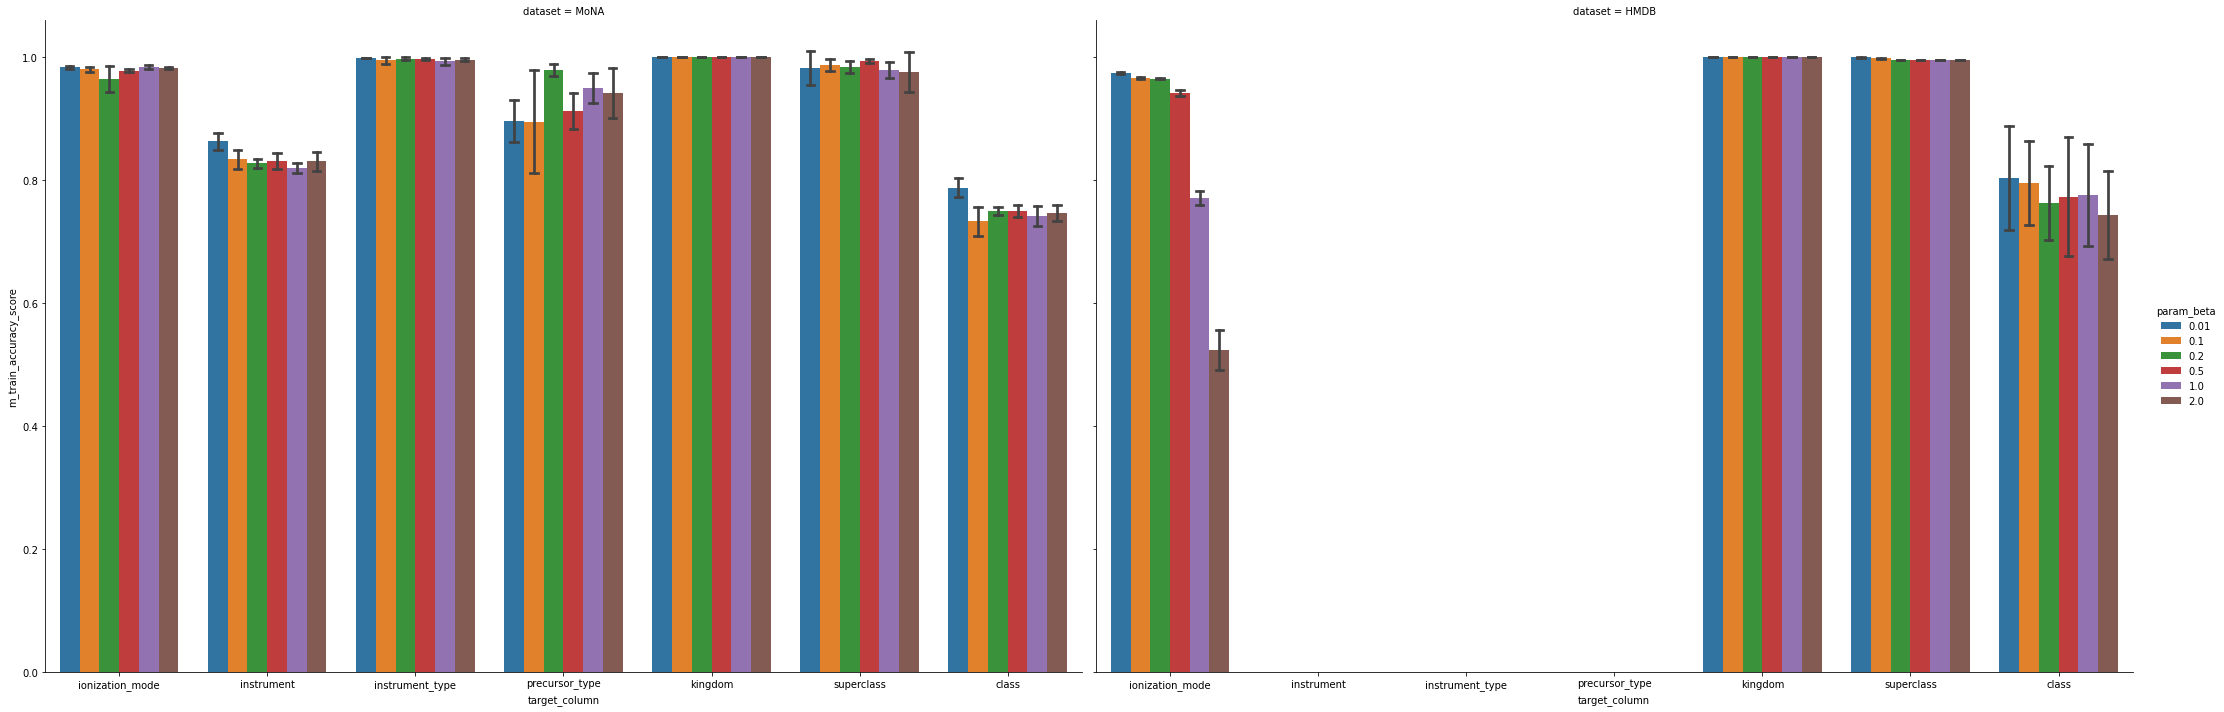

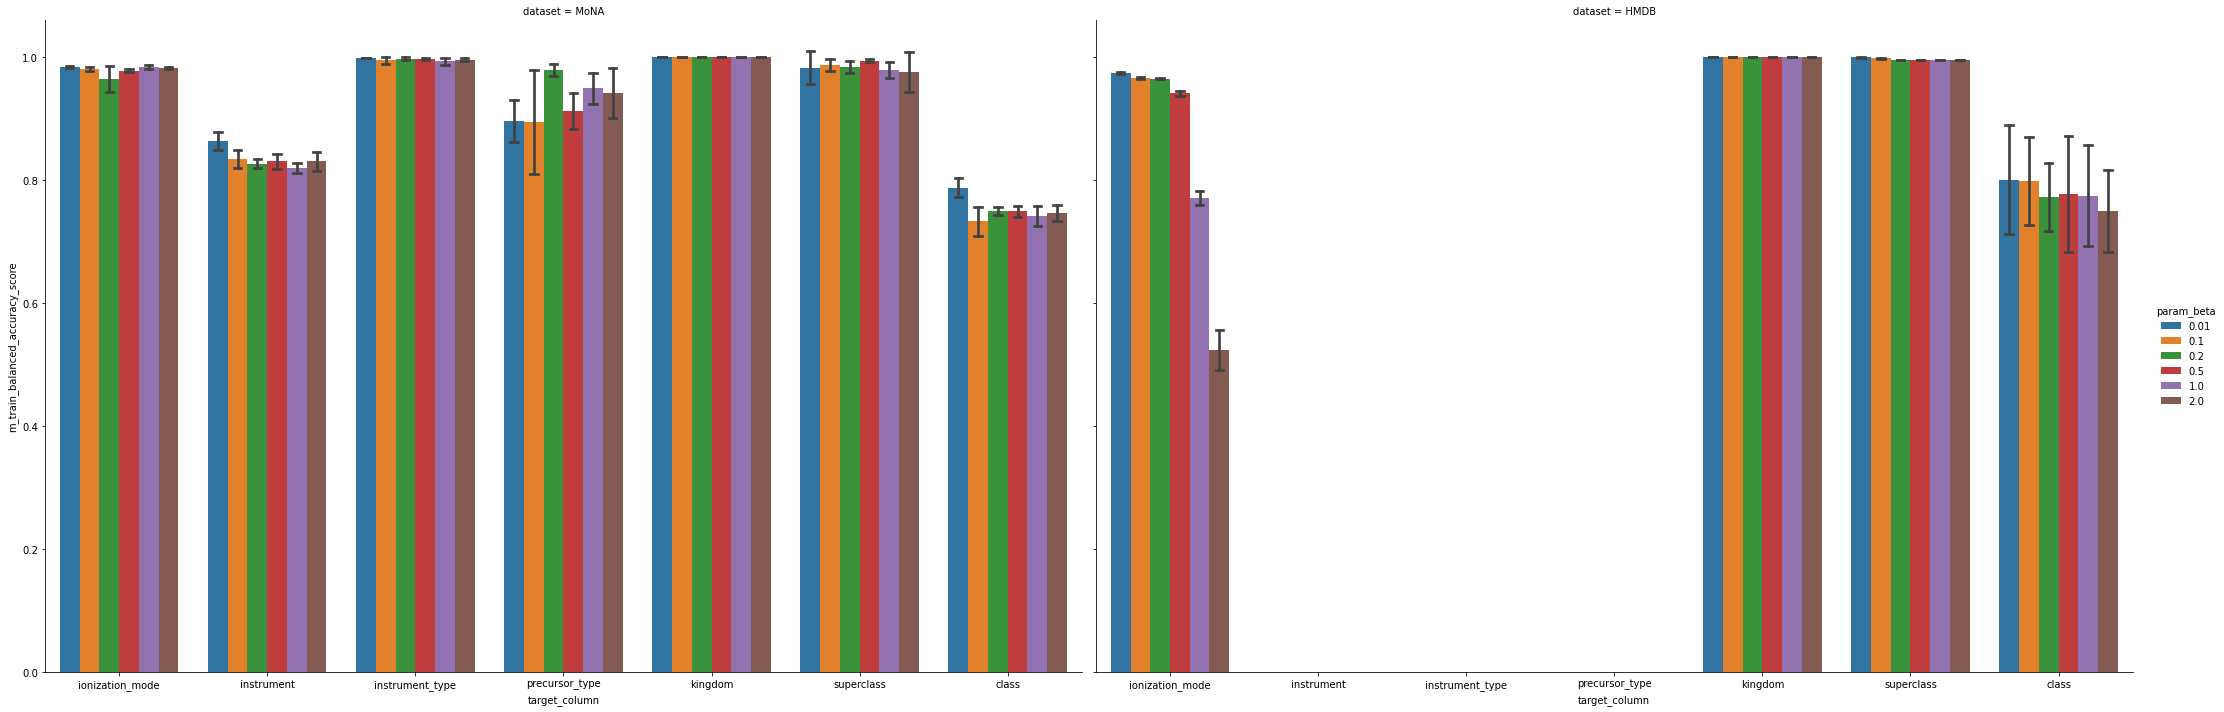

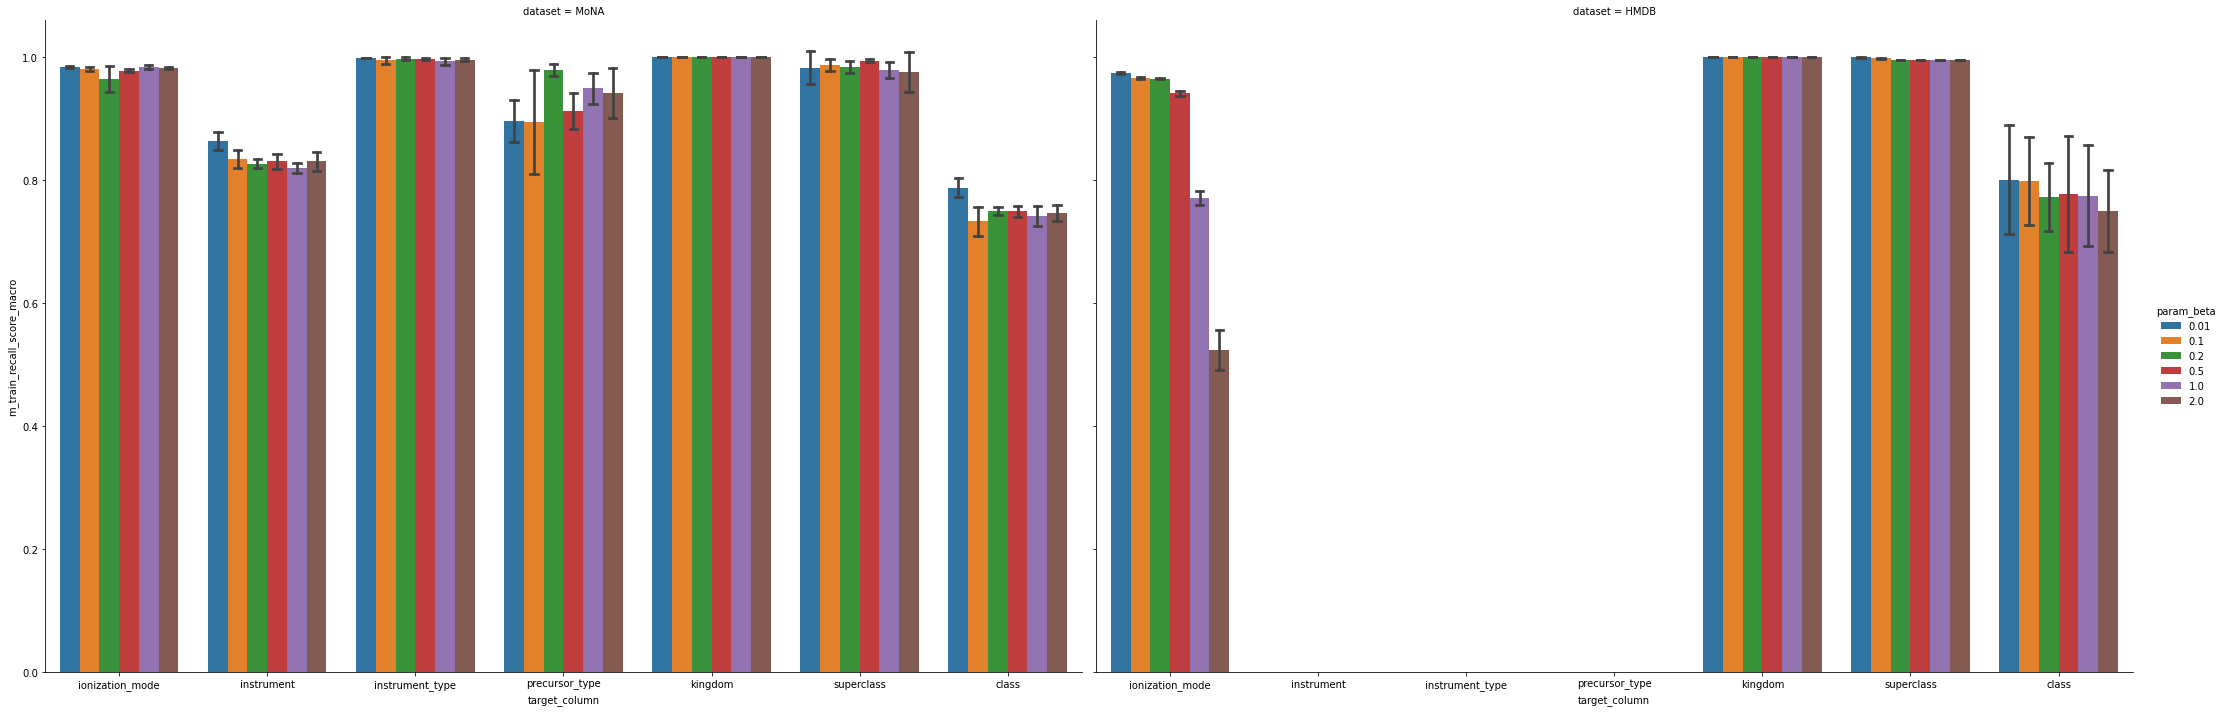

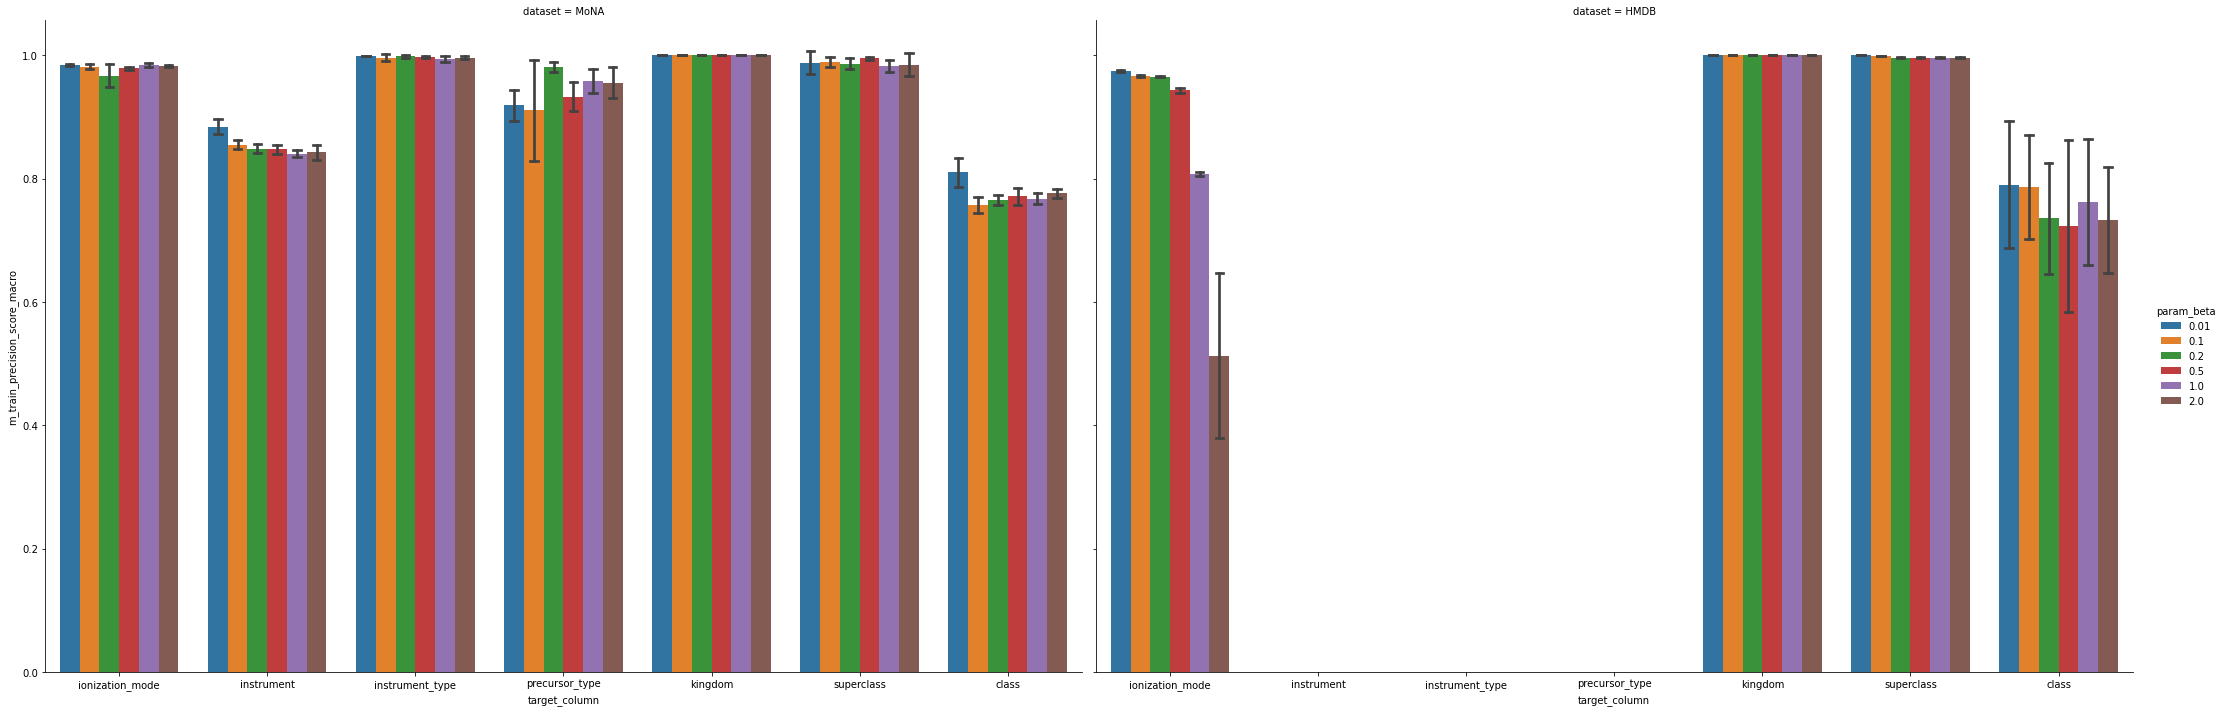

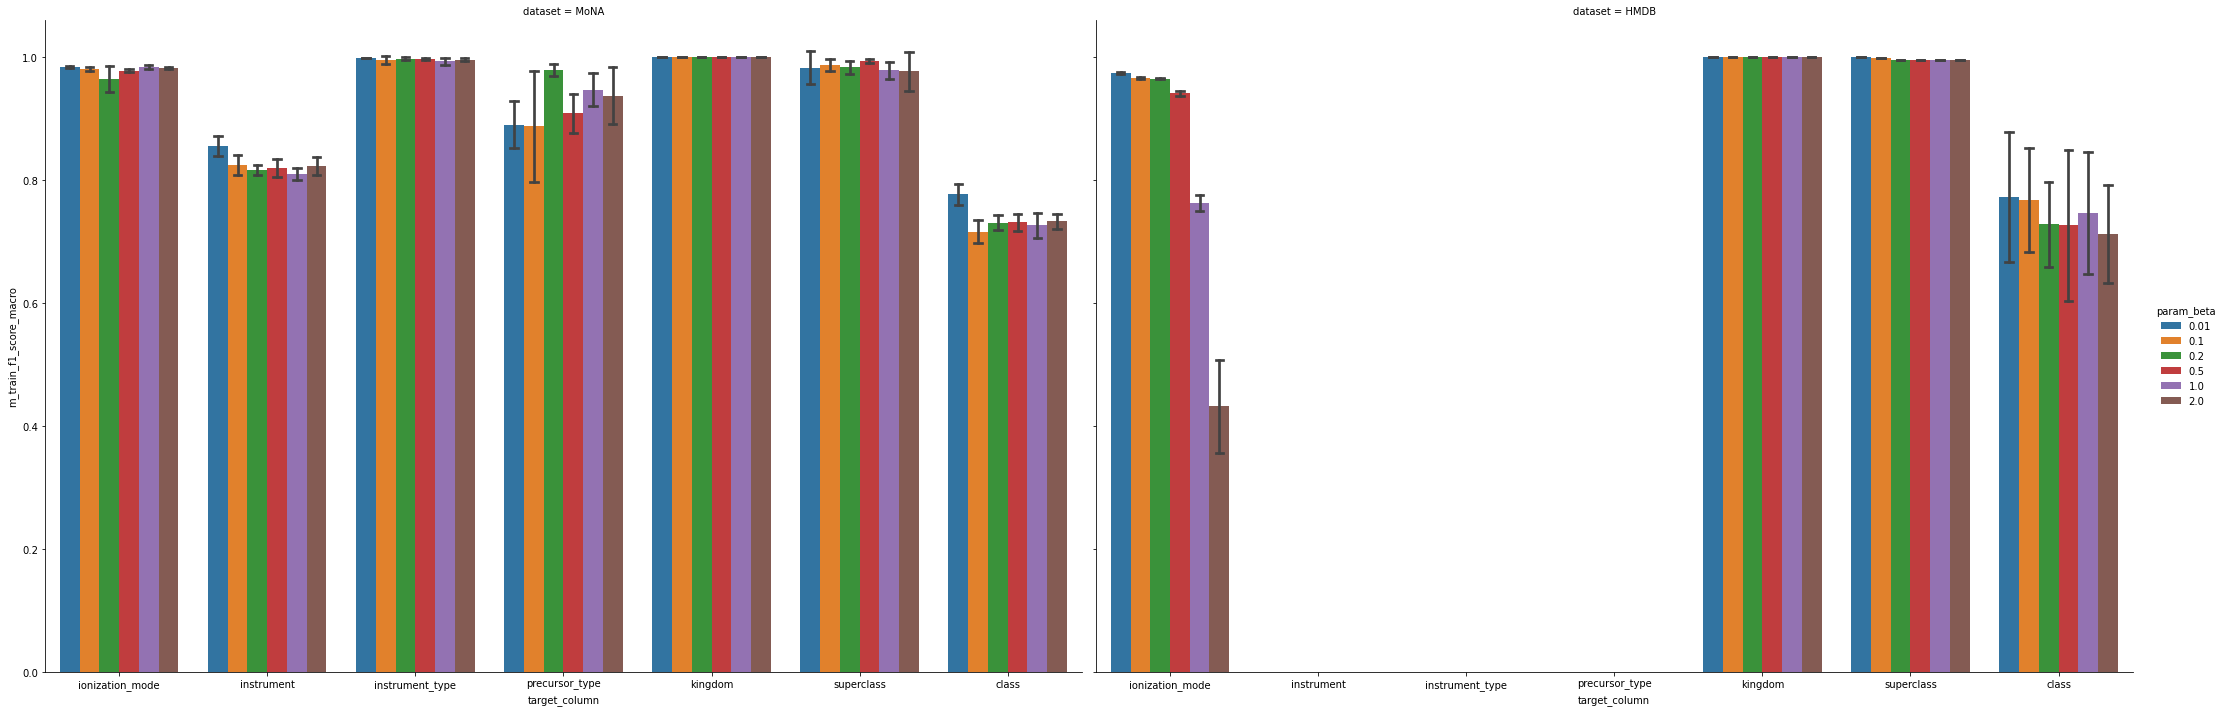

In [11]:
for column in clf_scores:
    ax = sns.catplot(data=df, x="target_column", y=column, col='dataset',
        hue="param_beta", kind="bar", ci="sd", capsize=.05, height=10, aspect=1.5)

## Feature importance

In [12]:
target_columns = df['target_column'].unique().tolist()

In [13]:
def extract_pfi(df, target_column):
    import ast
    dfpi = df[df['target_column'].isin([target_column])]
    def extract_pfi_(row):
        fi_dict = ast.literal_eval(row['feature_importance'])
        for k, v in fi_dict.items():
            row['pfi_' + k] = v
        return row
    return dfpi.apply(extract_pfi_, axis=1)

def plot_pfi(df, target_column, hue=None):
    dfpi = extract_pfi(df, target_column)
    pfi_cols = list(filter(lambda x: x.startswith('pfi_'), list(dfpi.columns)))
    oth_cols = list(filter(lambda x: not x.startswith('pfi_'), list(dfpi.columns)))
    dfpi = dfpi.melt(id_vars=oth_cols, value_vars=pfi_cols, var_name='PFI_column', value_name='PFI')
    result = dfpi.groupby(["PFI_column"])['PFI'].aggregate(np.mean).reset_index().sort_values('PFI', ascending=False)
    ax = sns.catplot(data=dfpi, x="PFI", y="PFI_column", hue=hue, kind="bar", ci="sd", 
        capsize=.05, height=10, aspect=1.5, order=result['PFI_column'], col='dataset')
    ax.fig.suptitle("PFI for %s target variable" % target_column)

In [14]:
dfs_ = [extract_pfi(df, tc) for tc in target_columns]
dfs = pd.concat(dfs_, ignore_index=True)
cols = columns.copy()
cols.remove('feature_importance')
pfi_cols = list(filter(lambda x: x.startswith('pfi_'), list(dfs.columns)))
dfs = dfs[cols + pfi_cols]
dfs.to_csv(utils.get_project_path() / '.model' / 'classifier_and_betavae_trained_jointly_all_features.csv')

### General

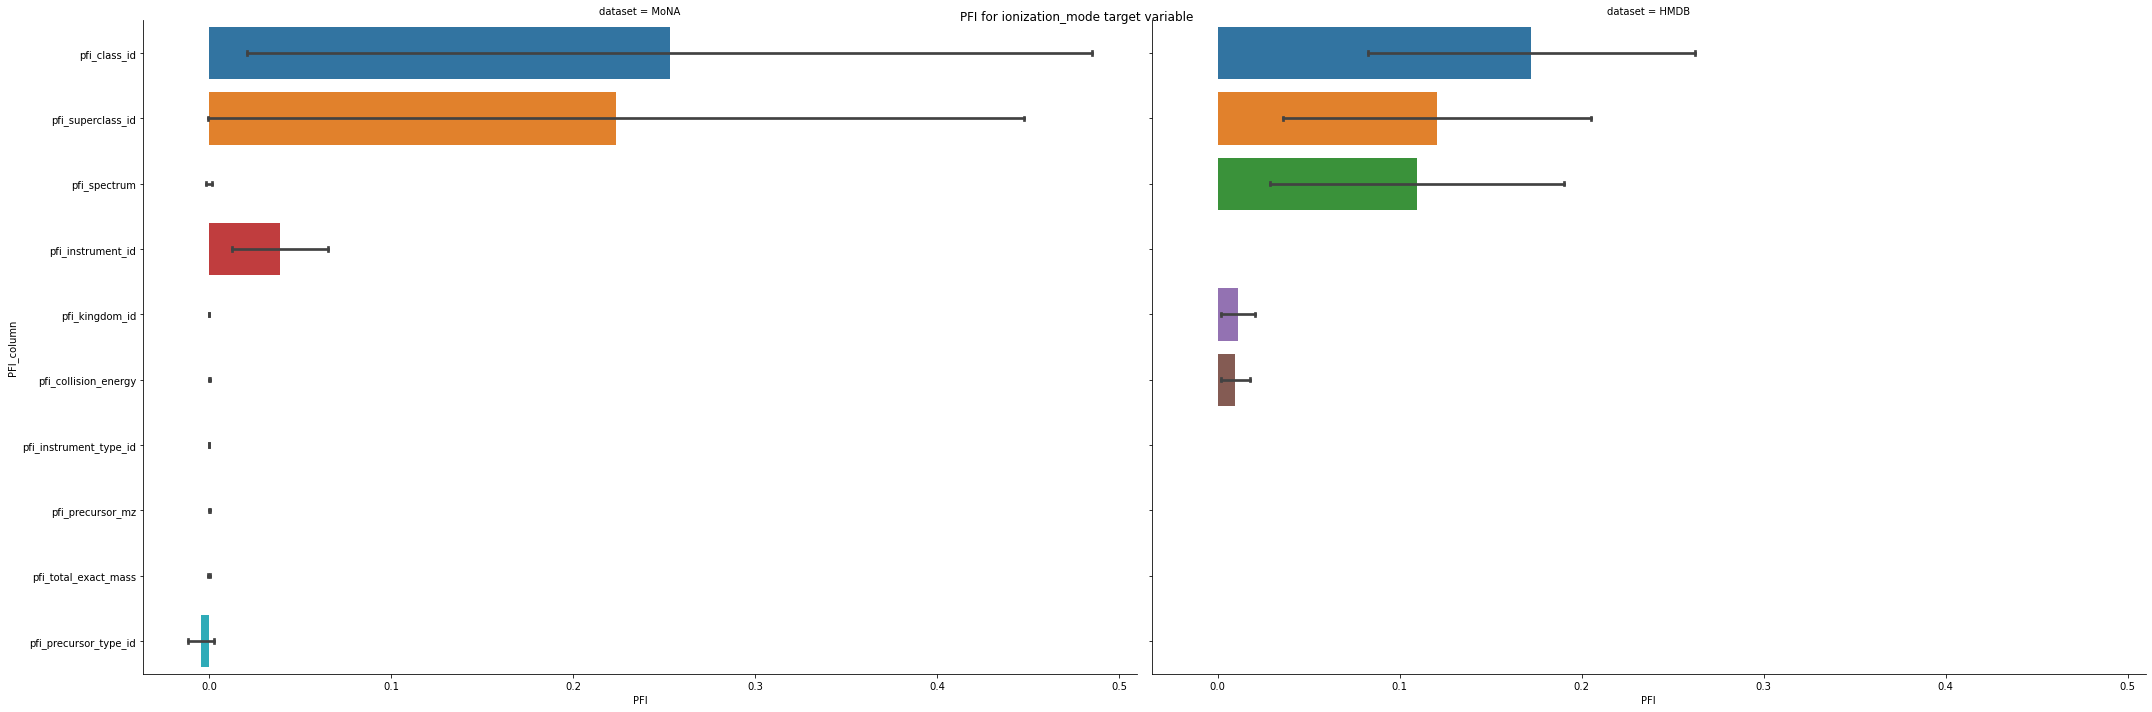

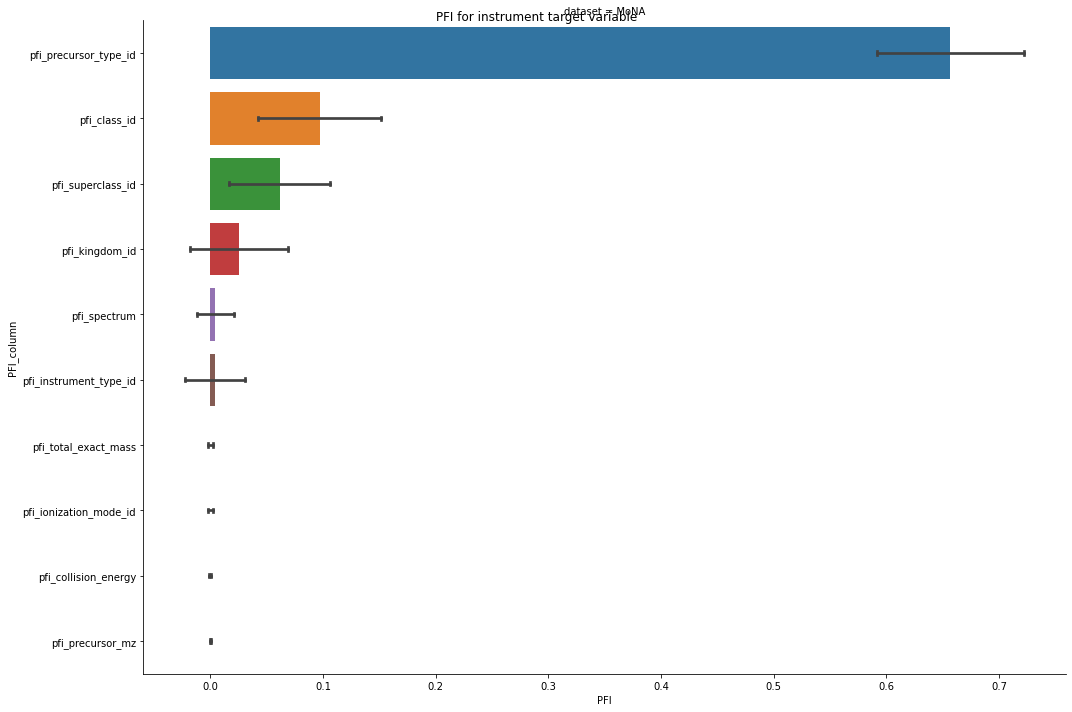

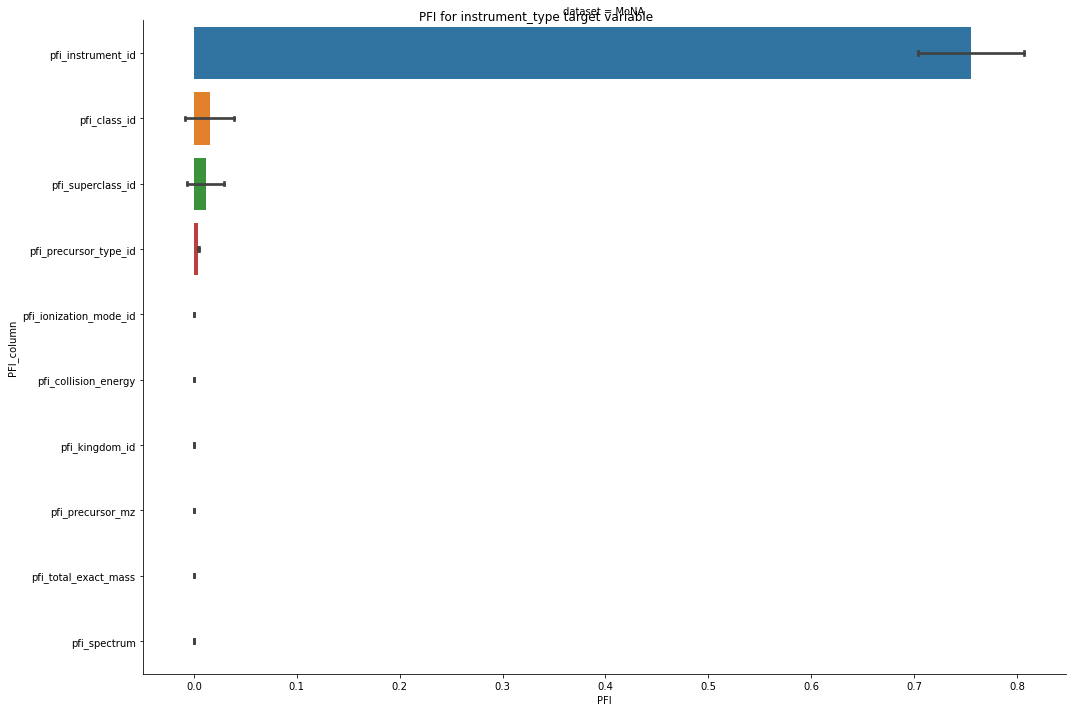

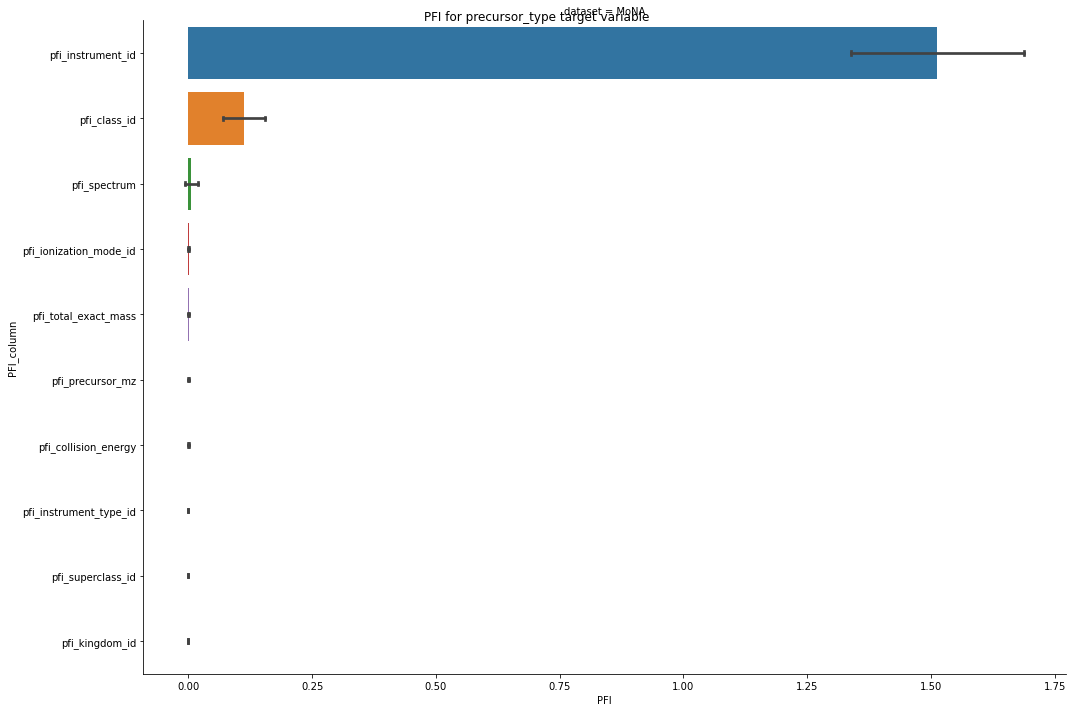

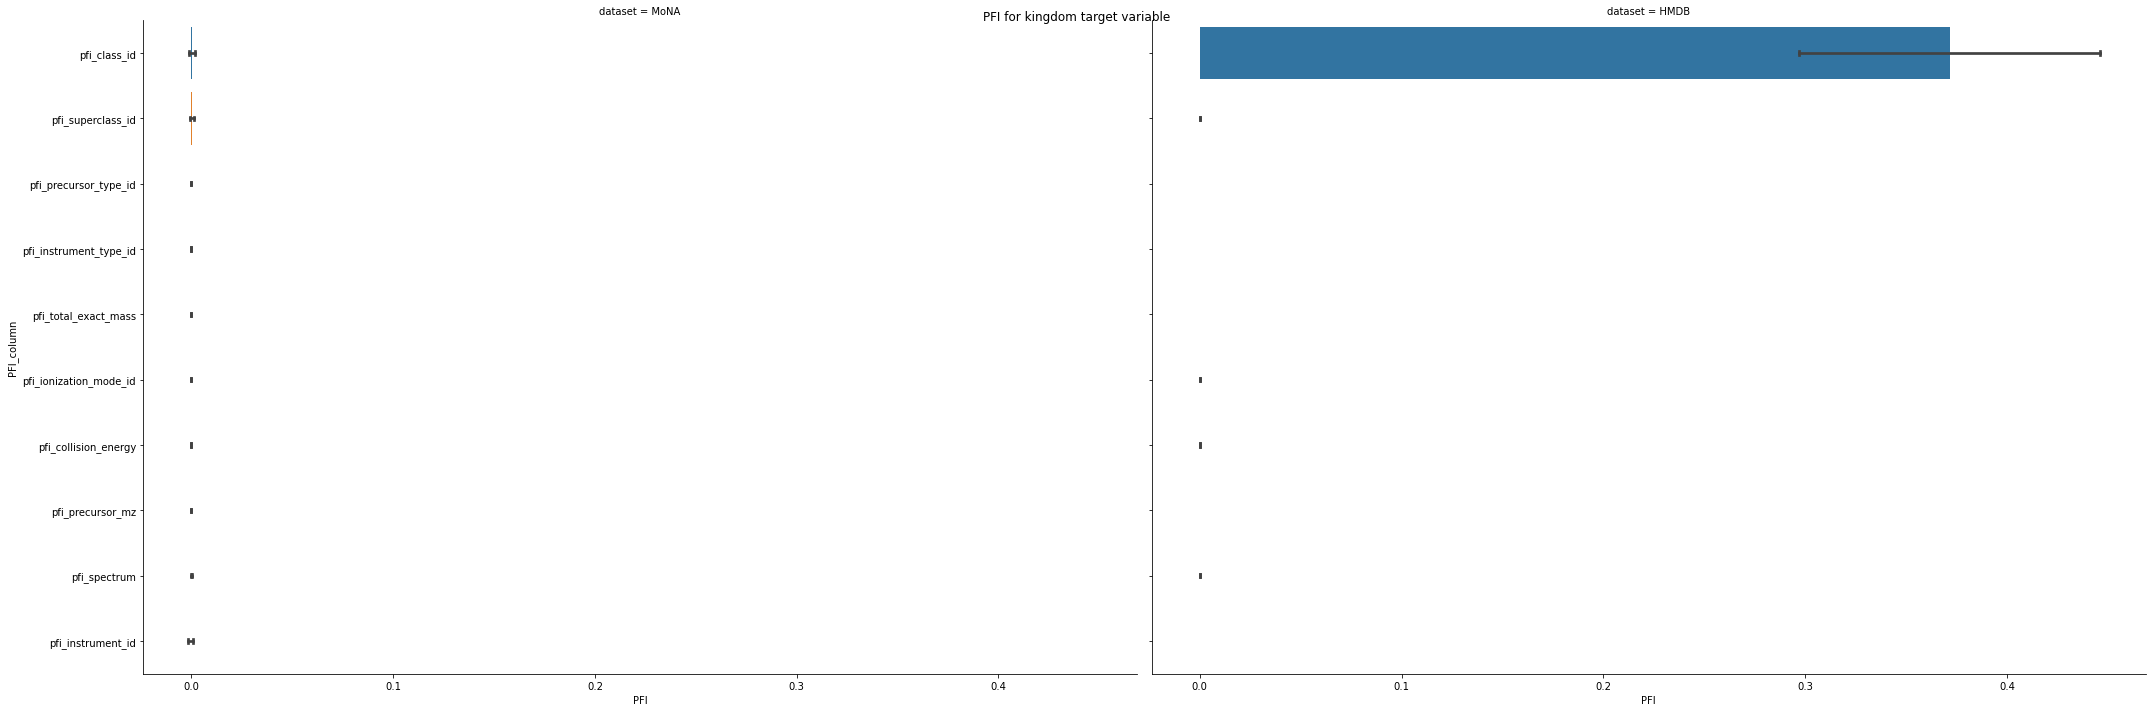

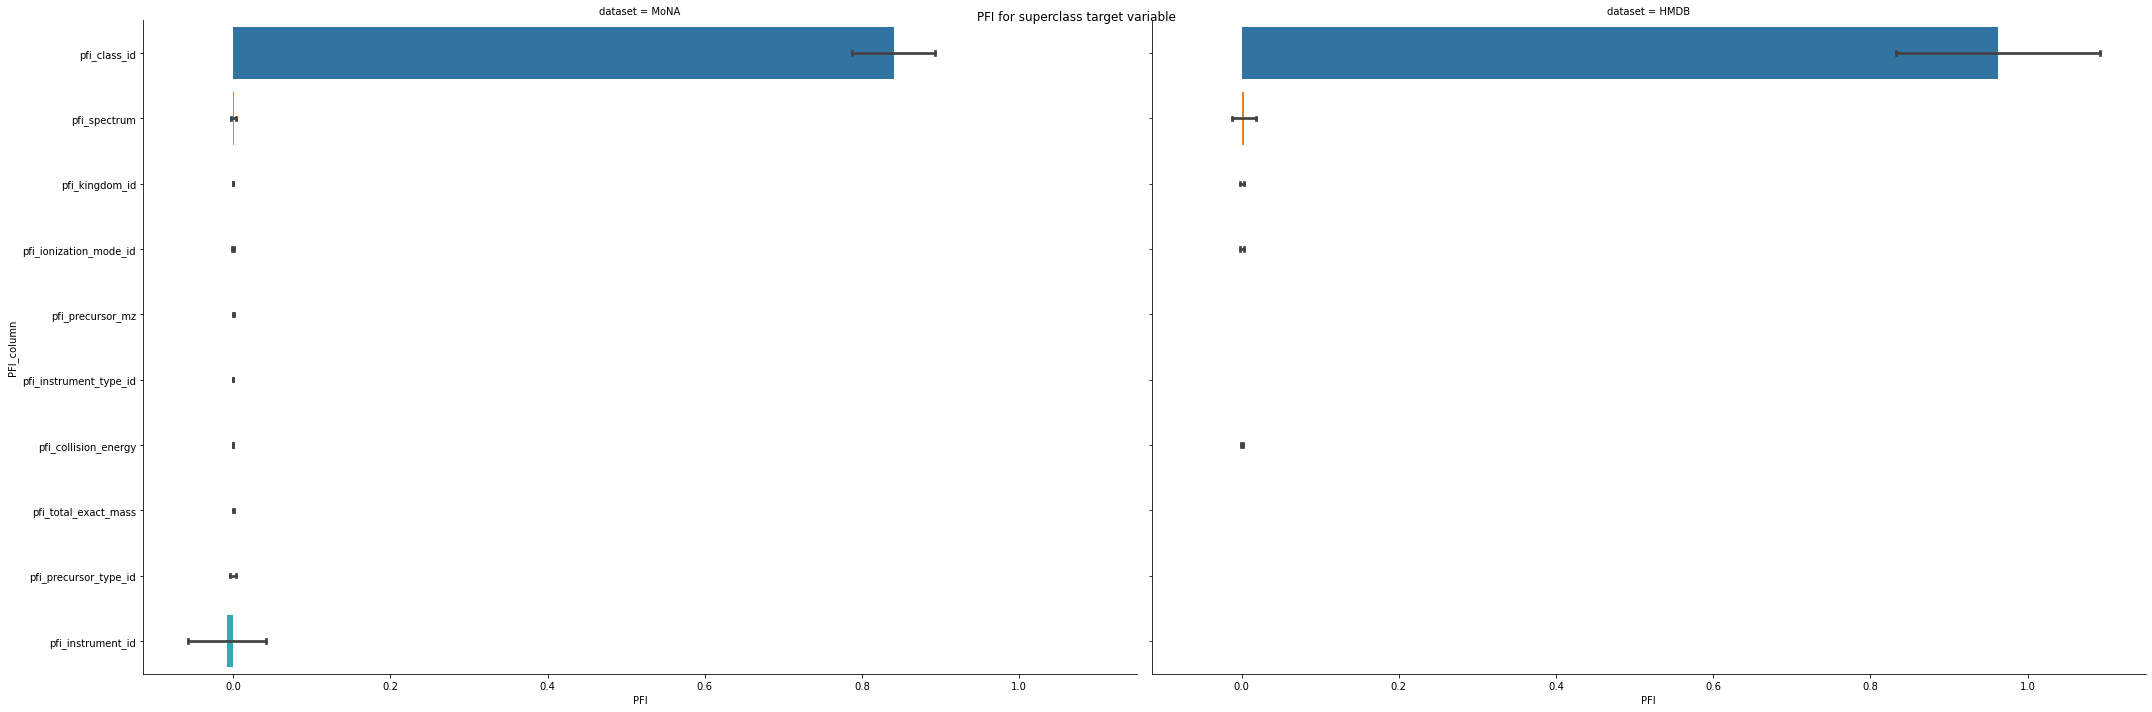

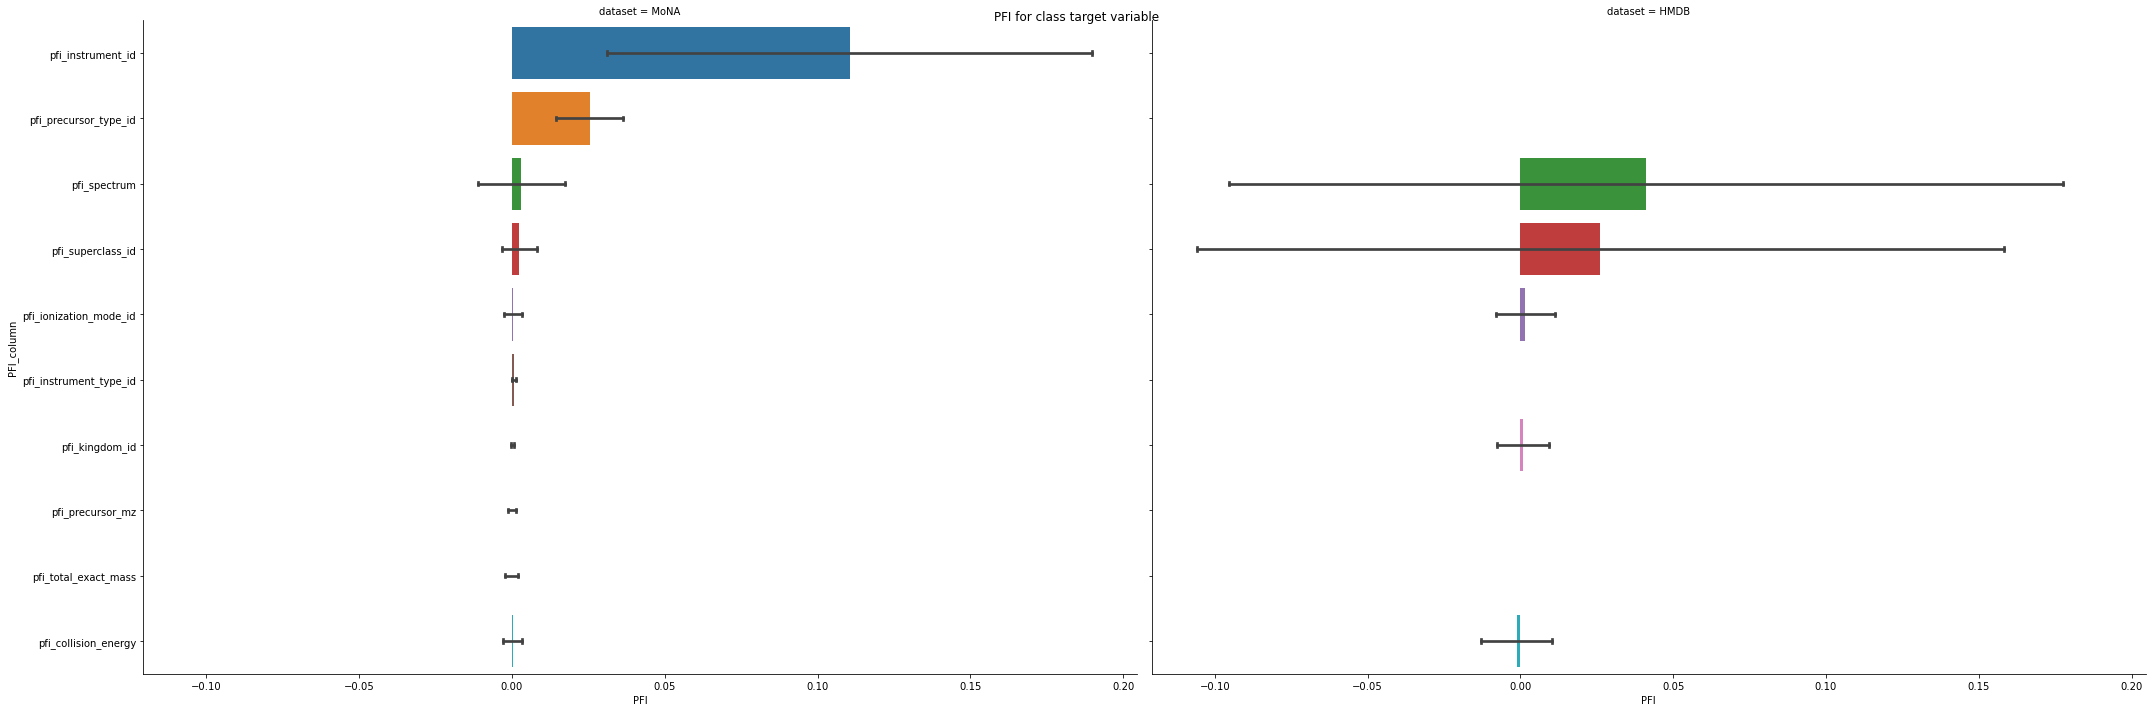

In [15]:
for tc in target_columns:
    plot_pfi(df, tc)

### Latent dim

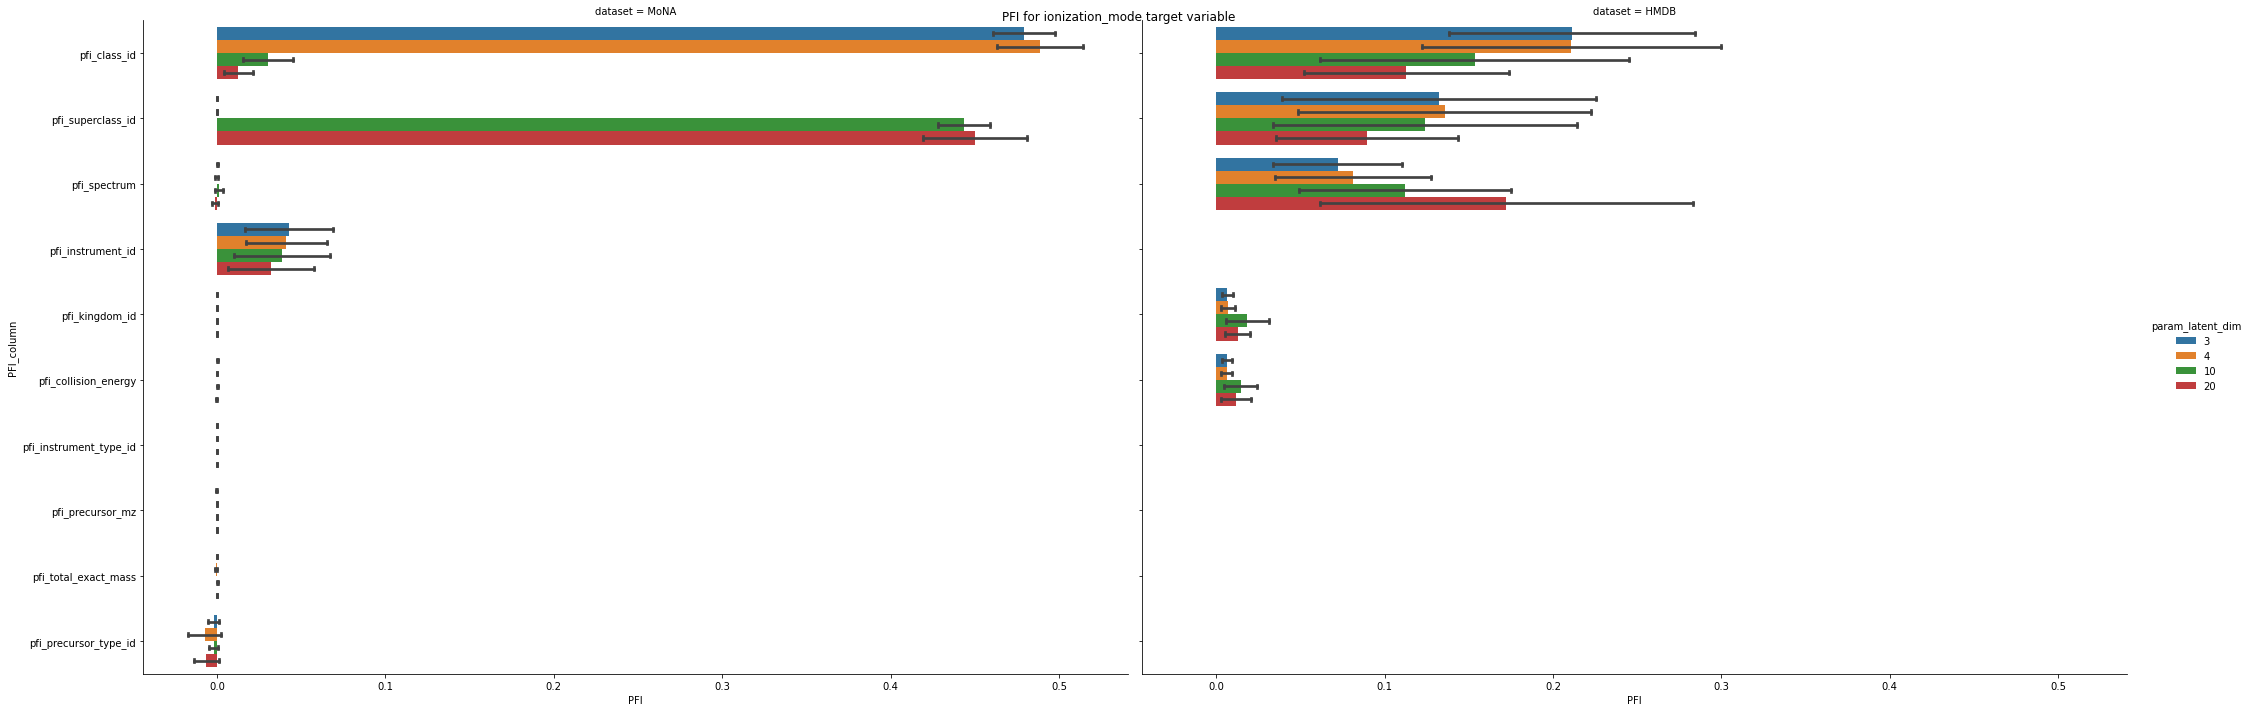

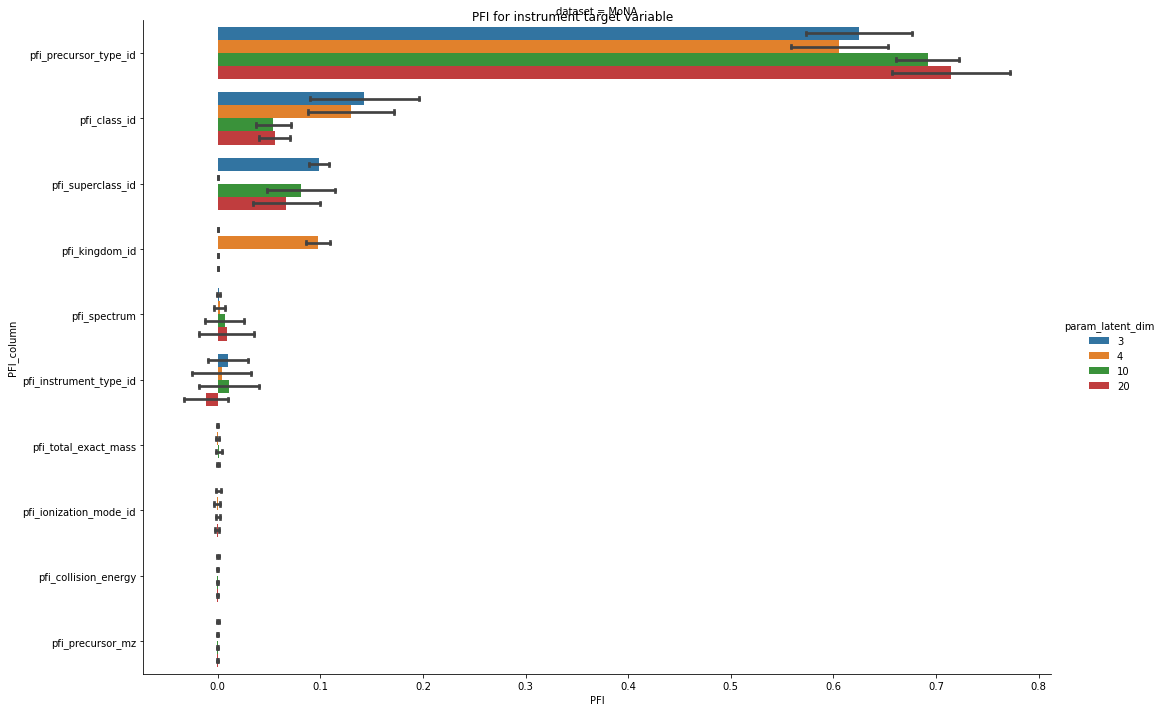

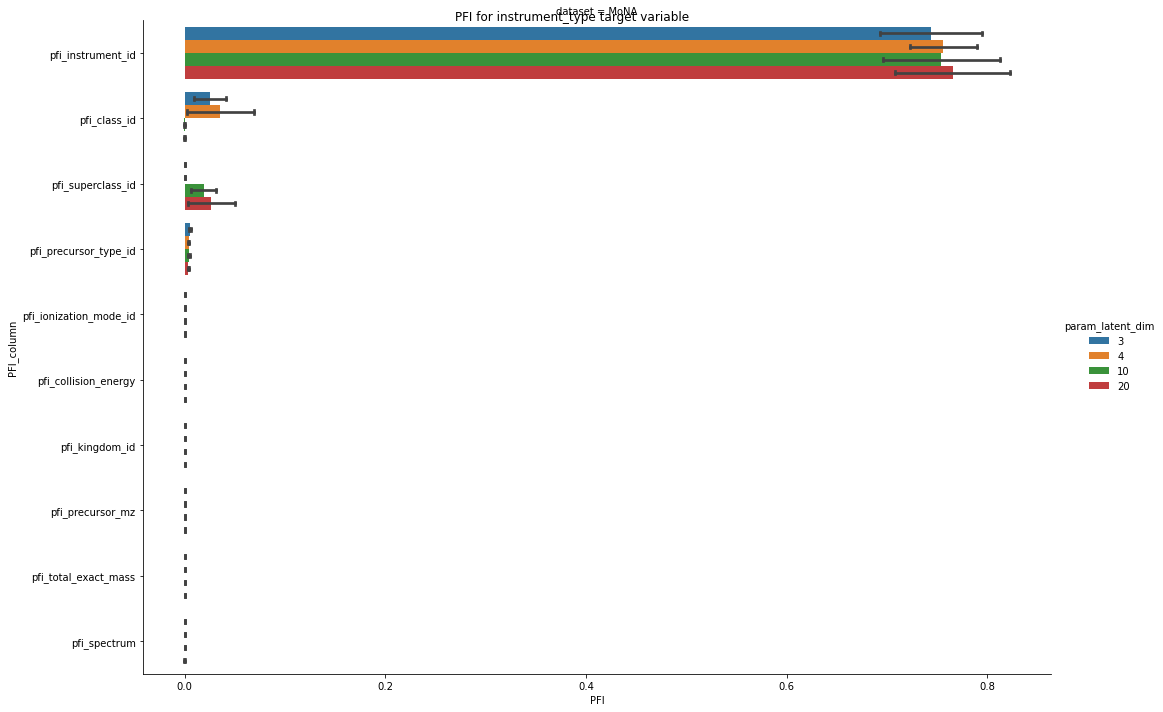

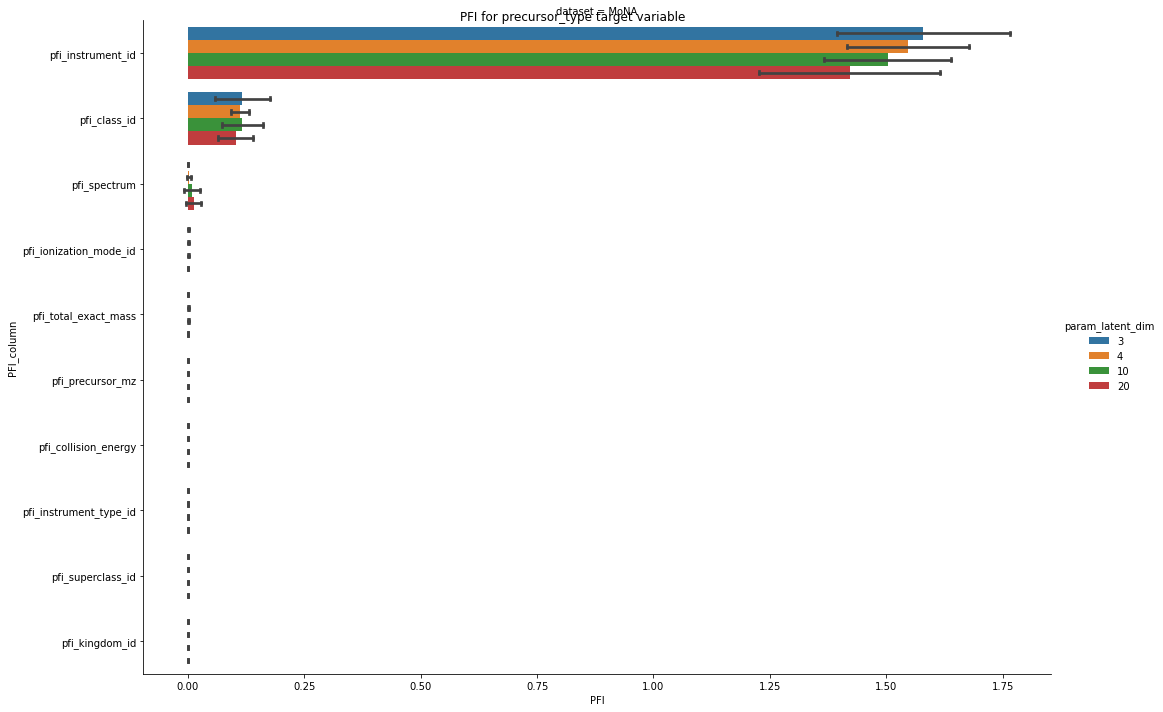

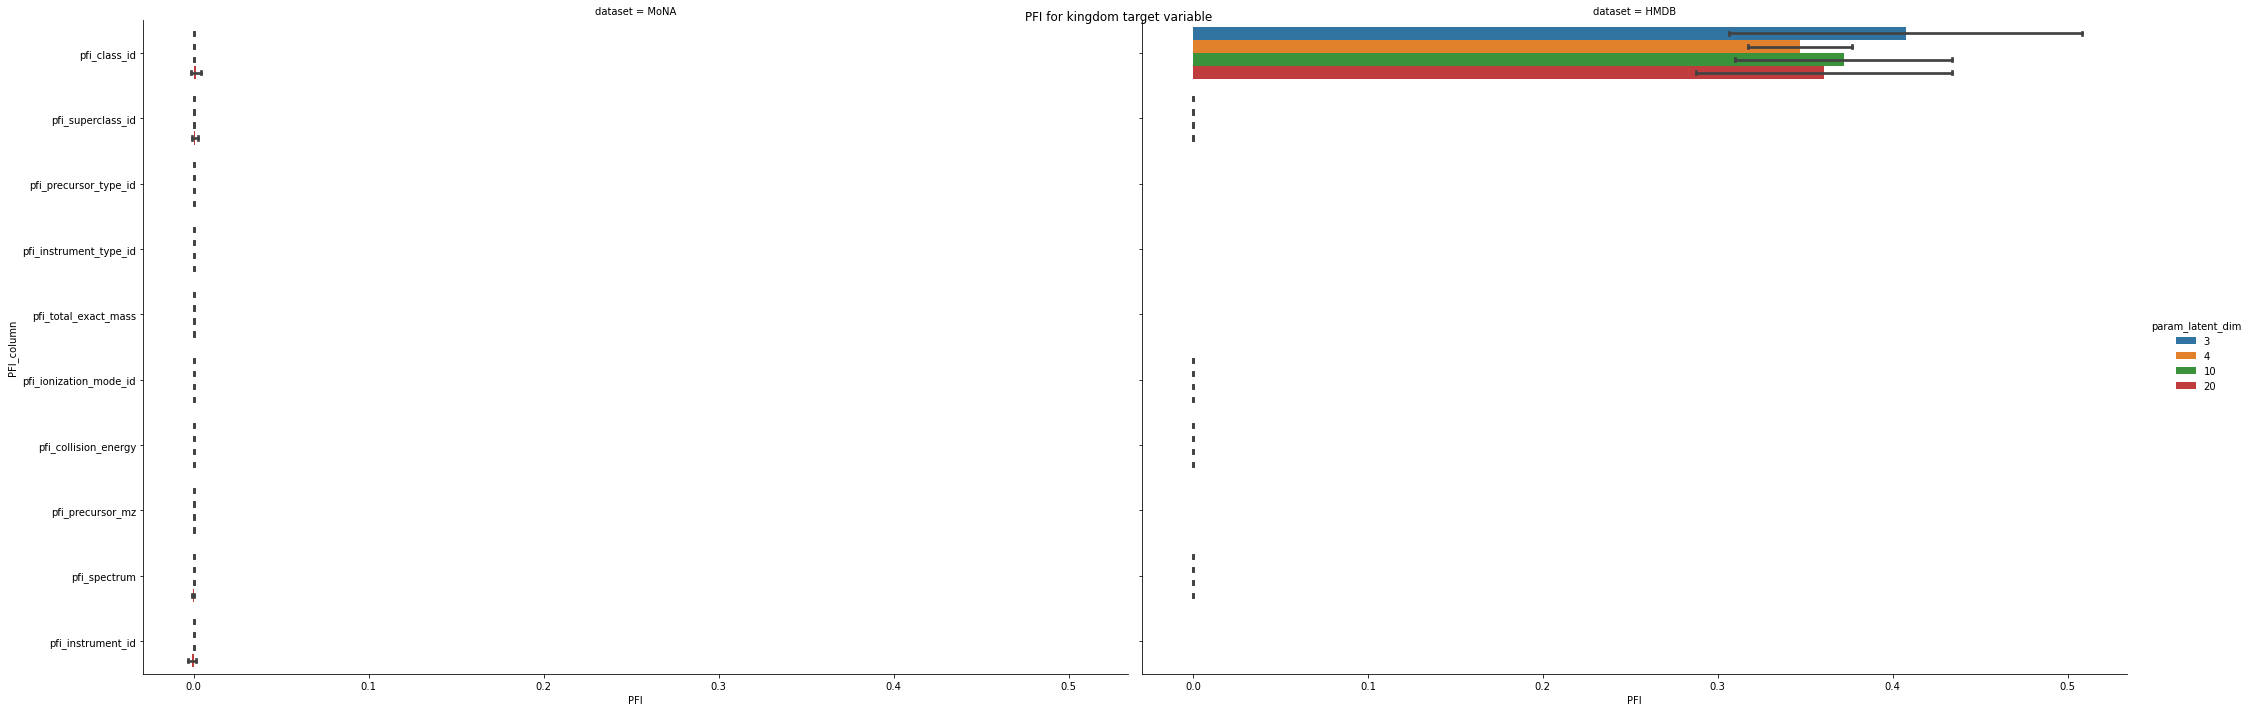

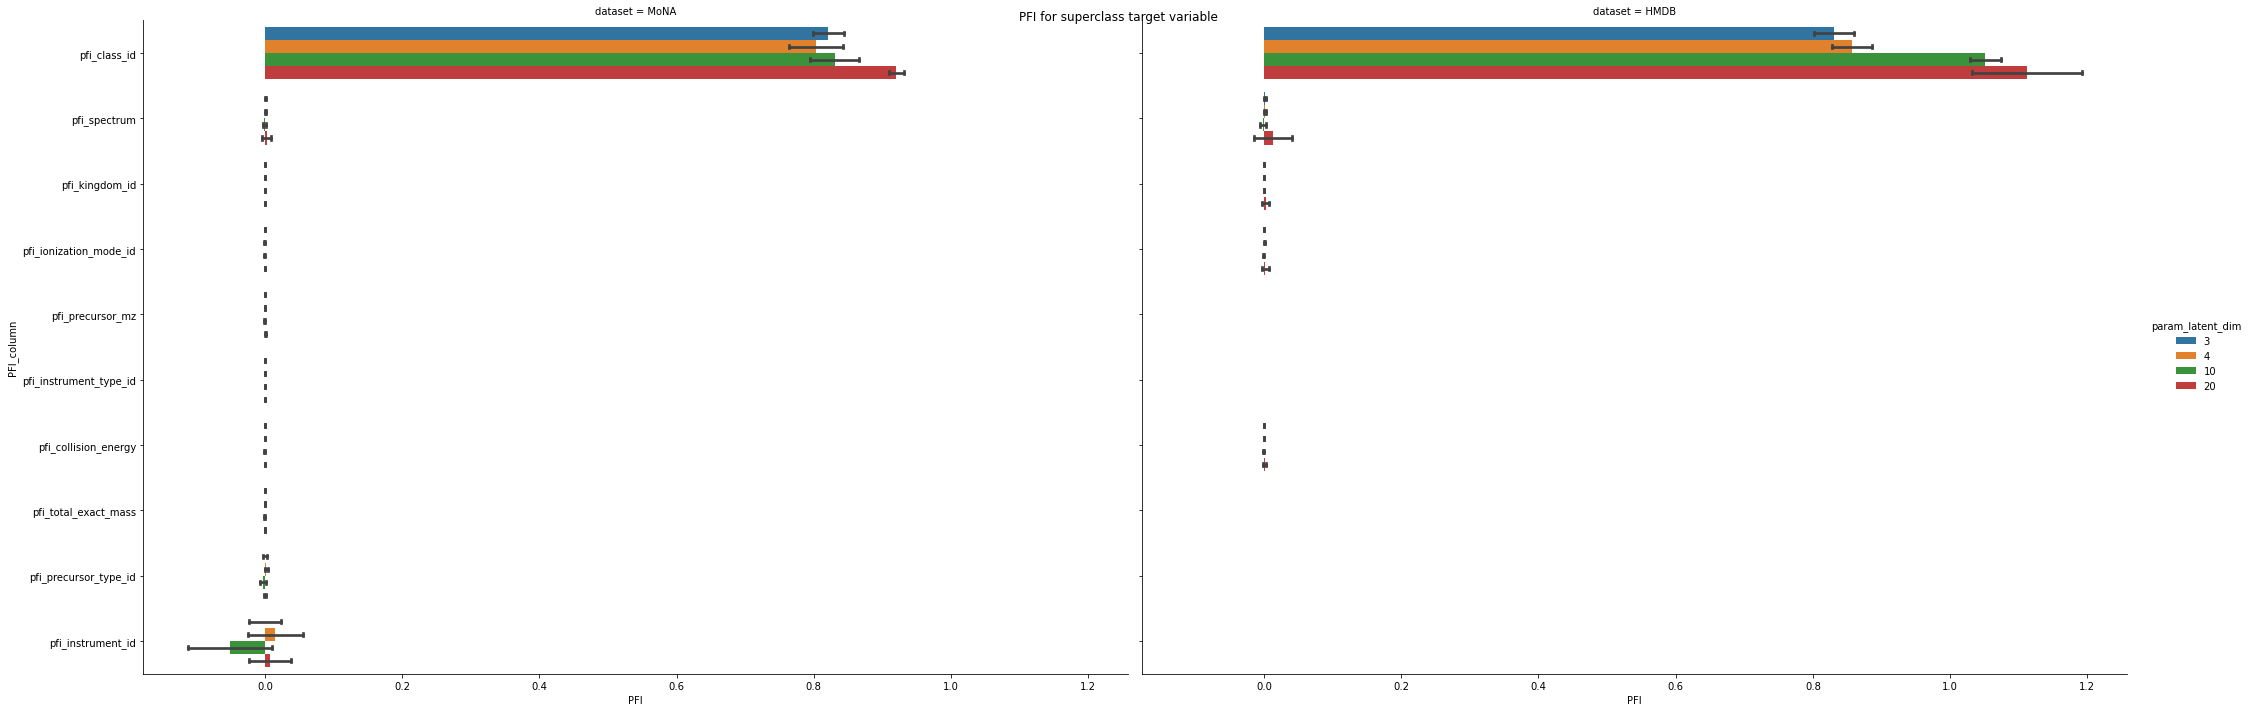

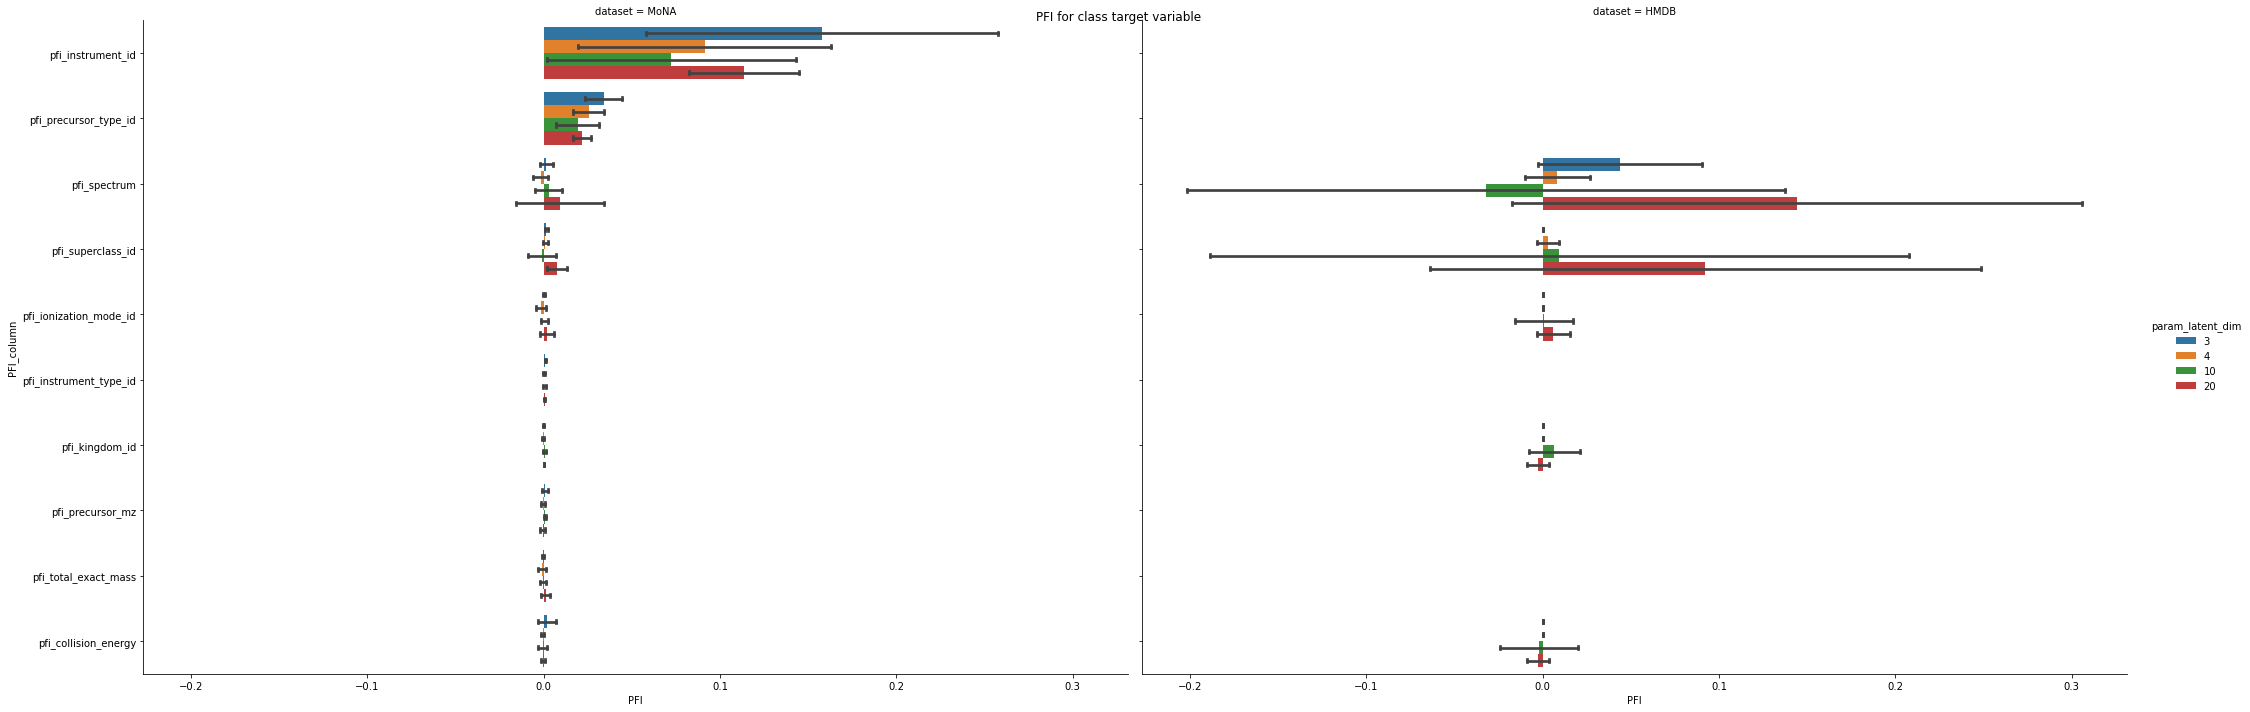

In [16]:
for tc in target_columns:
    plot_pfi(df, tc, hue='param_latent_dim')

### Beta

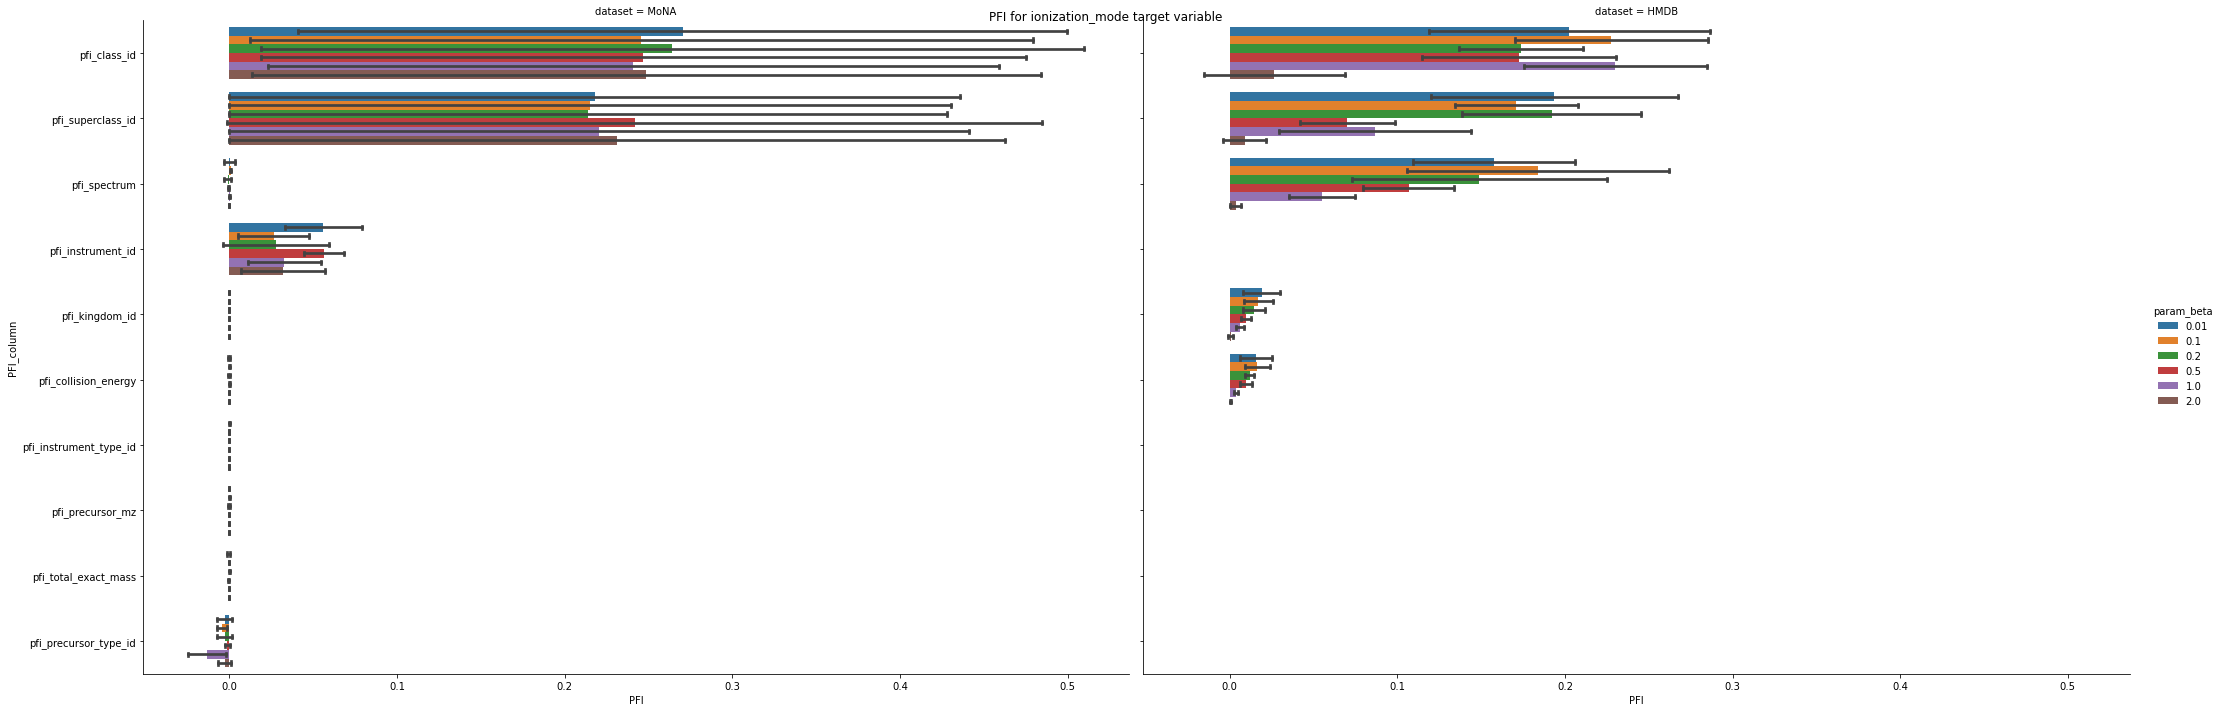

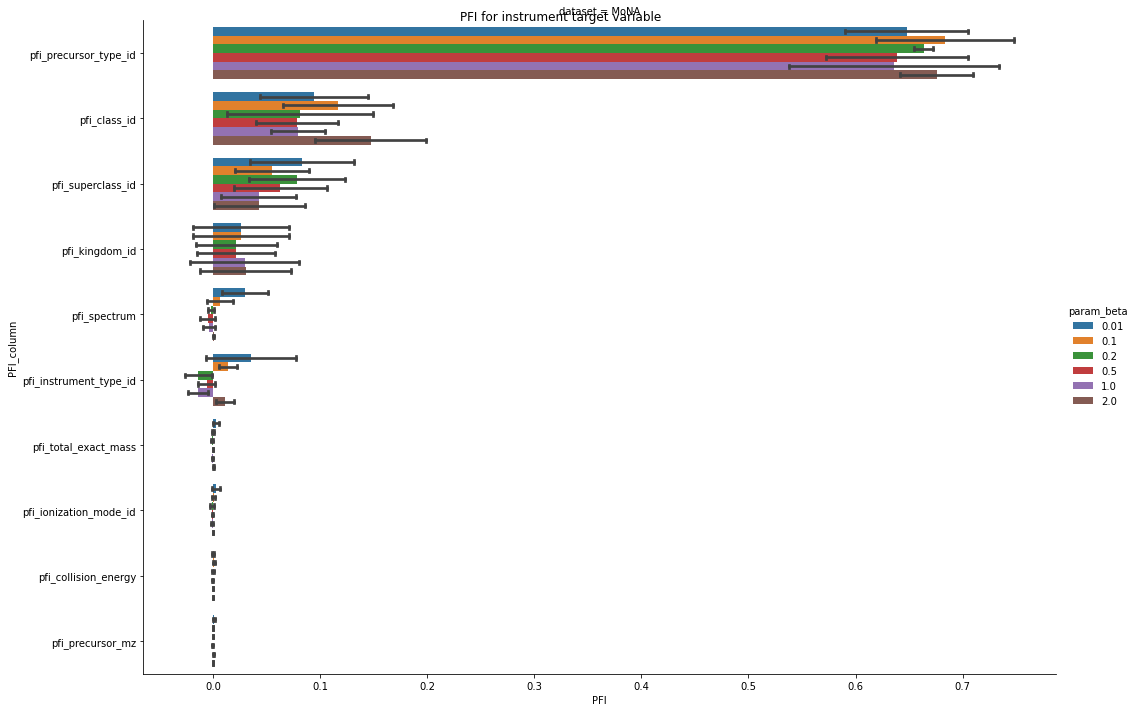

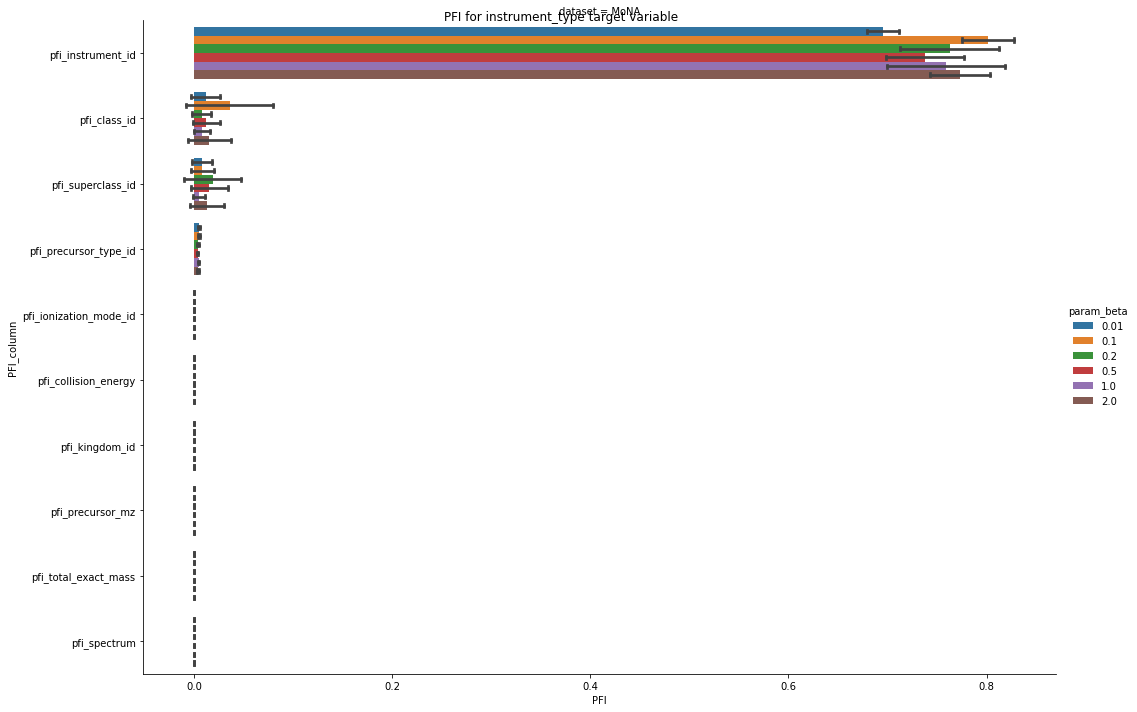

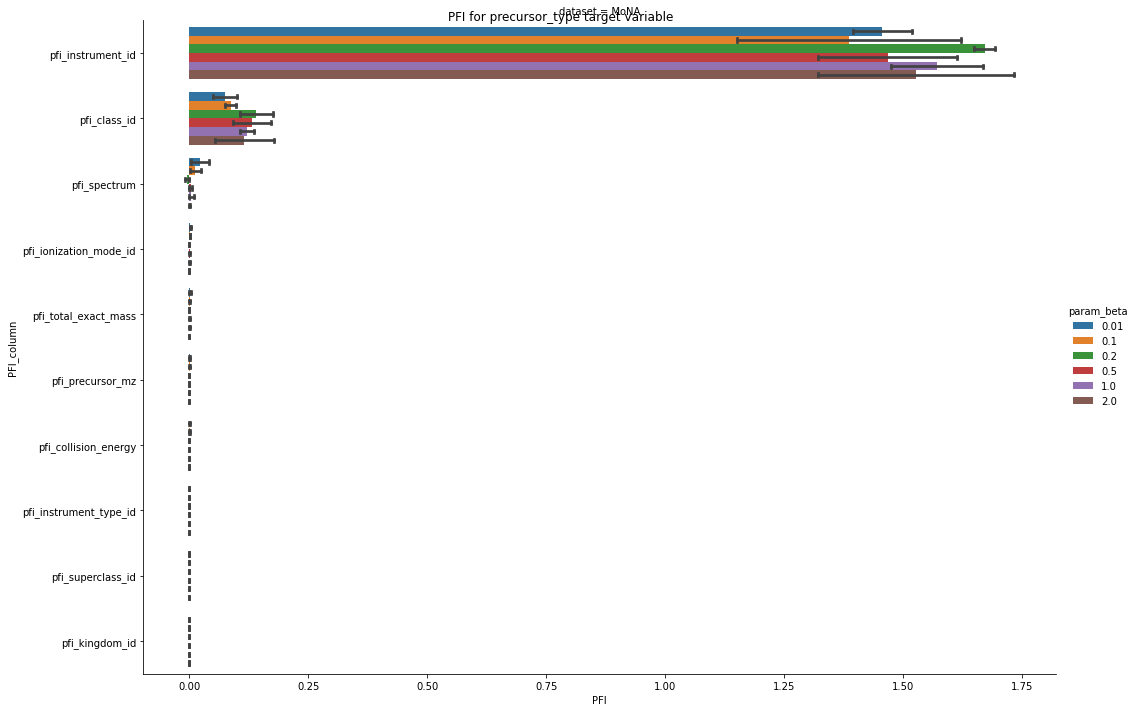

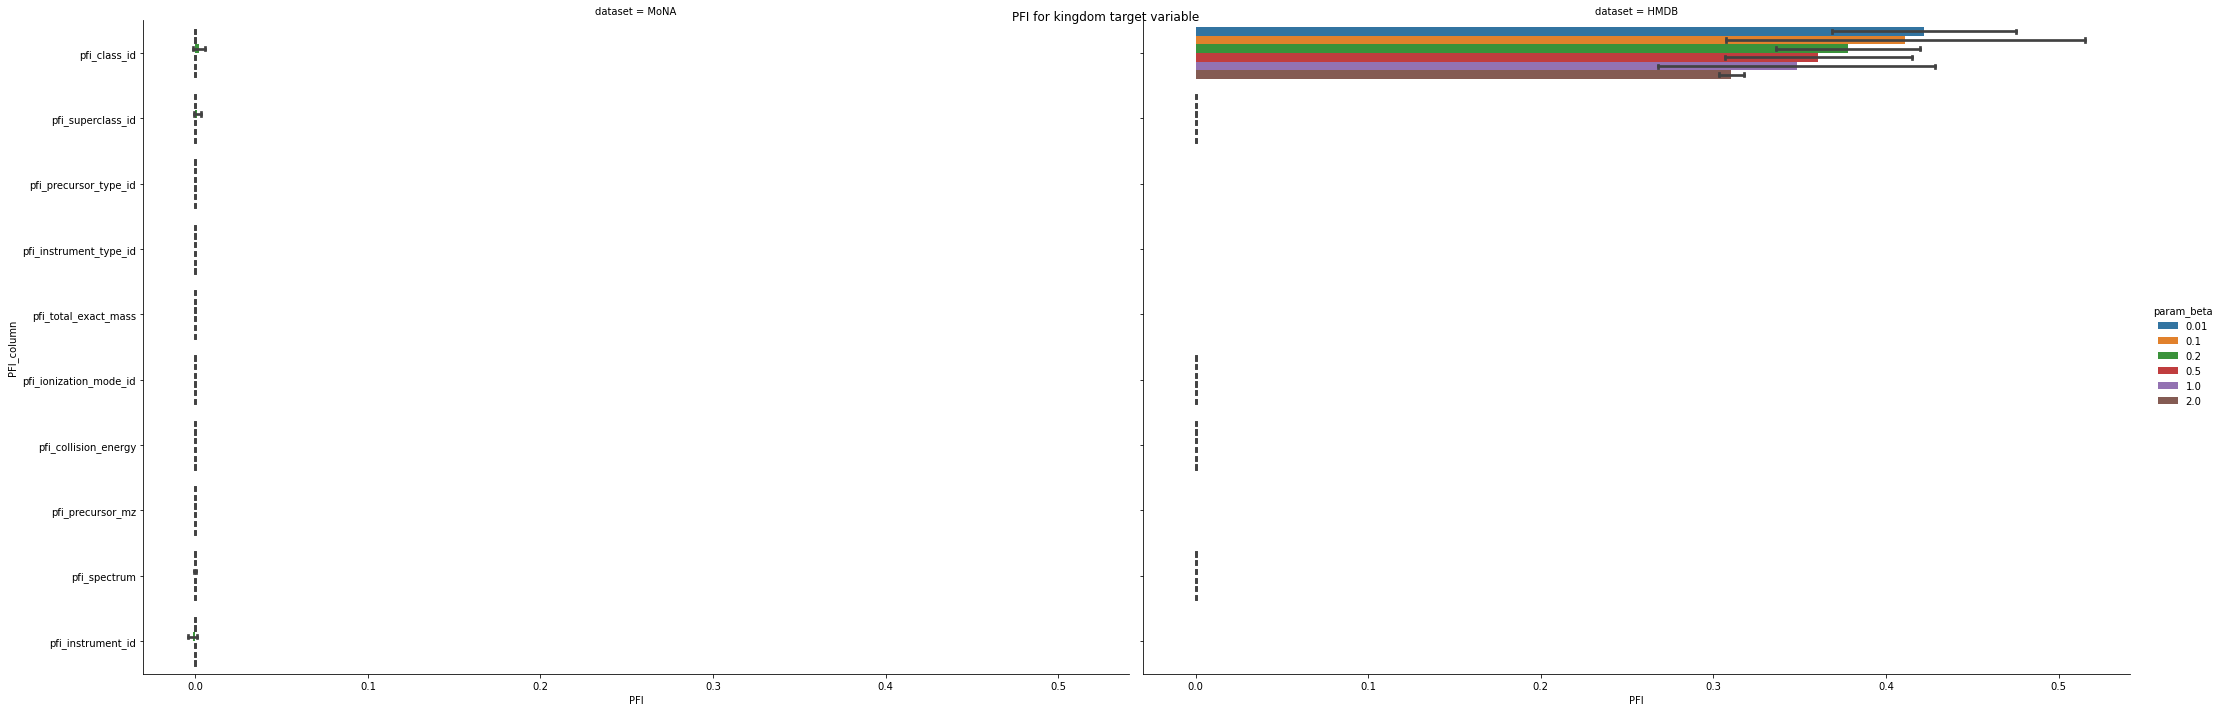

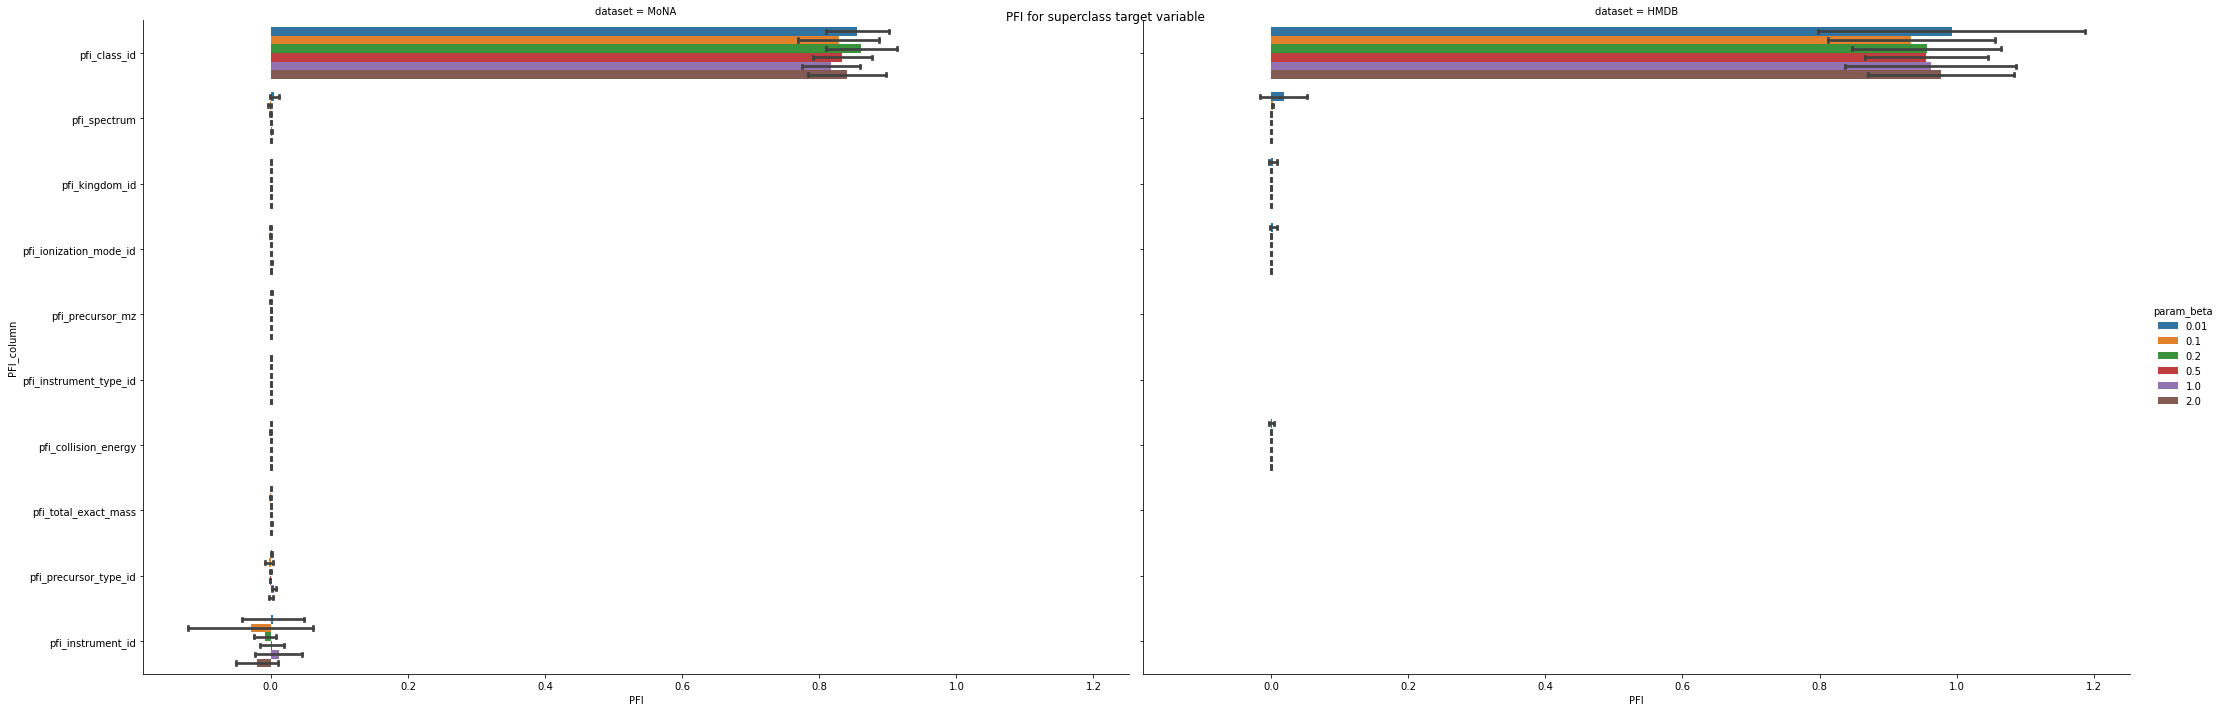

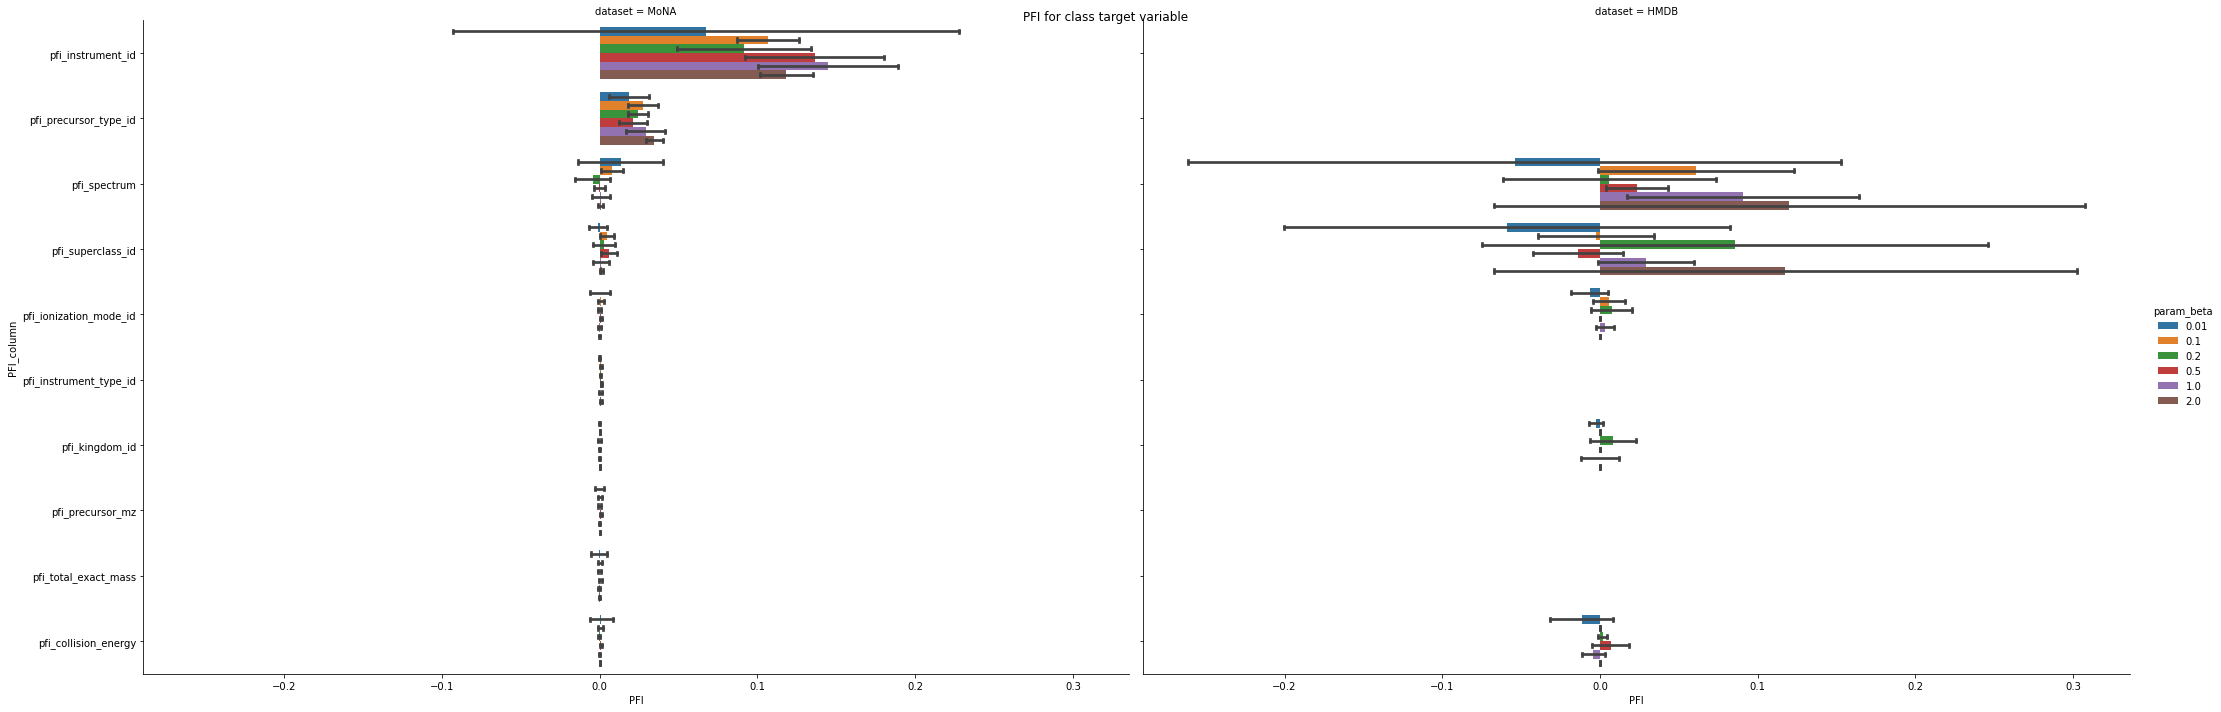

In [17]:
for tc in target_columns:
    plot_pfi(df, tc, hue='param_beta')